# Extracting Log Files, Converting them into CSV and DF, Merging all the CSVs

In [ ]:
# import zipfile

# # specify the path to the zip file
# zip_path = 'logs_202212.zip'

# # open the zip file
# with zipfile.ZipFile(zip_path, 'r') as zip_ref:
#     # list all files in the zip file
#     zip_file_contents = zip_ref.namelist()

#     # extract all files in the zip file to a directory
#     extract_directory = '/users/shubhampalande/Downloads/extracted_files/'  # replace with the name and path of the directory you want to extract to
#     zip_ref.extractall(path=extract_directory)

In [ ]:
import os
import csv

# specify the path to the directory containing the log files
log_dir_path = '/users/ankitabandal/Downloads/Extracted_Files/20221220/'  # replace with the path to your log directory

# create a list to store the log file paths
log_file_paths = []

# loop through each file in the log directory
for filename in os.listdir(log_dir_path):
    # check if the file is a log file
    if filename.endswith('.log'):
        # construct the path to the log file
        log_file_path = os.path.join(log_dir_path, filename)
        # add the log file path to the list
        log_file_paths.append(log_file_path)

# create a CSV file to write the log contents to
csv_file_path = '/users/ankitabandal/Downloads/Extracted_Files/Logs_20221220.csv'  # replace with the path to your CSV file
with open(csv_file_path, 'w') as csv_file:
    # create a CSV writer object
    csv_writer = csv.writer(csv_file)
    
    # loop through each log file
    for log_file_path in log_file_paths:
        # open the log file and read its contents
        with open(log_file_path, 'r') as log_file:
            # read the log file into a list of lines
            log_lines = log_file.readlines()

        # loop through each line of the log file and write it to the CSV file
        for line in log_lines:
            # split the line into fields
            fields = line.strip().split(',')
            # write the fields to the CSV file
            csv_writer.writerow(fields)

In [ ]:
import pandas as pd
import glob

# Define a list to store the dataframes
dfs = []

# Get a list of all CSV files in the directory
csv_files = glob.glob('/users/ankitabandal/Downloads/Extracted_Files/Logs_*.csv')

# Loop through each CSV file
for file in csv_files:
    # Read the CSV file into a dataframe
    df = pd.read_csv(file, header=None, error_bad_lines=False)
    
    # Assign column names to the dataframe
    df.columns = column_names
    
    # Append the dataframe to the list
    dfs.append(df)

# Merge all dataframes into a single dataframe
merged_df = pd.concat(dfs, ignore_index=True)

In [ ]:
sorted_df = merged_df.sort_values('Timestamp')

In [ ]:
sorted_df.head(10)

In [ ]:
sorted_df.to_csv('/users/ankitabandal/Downloads/Extracted_Files/Merged_Data.csv', index=False)

In [ ]:
import pandas as pd
df = pd.read_csv("/users/ankitabandal/Downloads/Extracted_Files/Merged_Data.csv")
df.head(10)

# Data Cleaning

In [ ]:
# Creating a copy of Original Dataframe so the further exploration is implemented on the Copied Dataframe and the Original Dataframe remains as it is
df_1 = df.copy()
df_1.head(5)

In [ ]:
df_1.MessageCode.nunique()

In [ ]:
df_1['Source of Envelope'].nunique()

In [ ]:
df_1 = df_1.drop(['Source of Envelope','MessageCode','RequestId','EventId.1','HttpAuthHash','ResourceClass','ResourceMethod'] , axis=1)

In [ ]:
## Replacing the Unique Organziations to Positive Integers (1,2,3,...)

# Get a list of unique values in the column you want to replace
unique_values = df_1['Organization'].unique()

# Create a mapping between the unique values and their corresponding IDs
value_id_map = {value: f'{i+1}' for i, value in enumerate(unique_values)}

# Replace the values in the dataframe with their corresponding IDs
df_1['Organization'] = df_1['Organization'].map(value_id_map)

In [ ]:
## Replacing the Unique Users to Positive Integers (1,2,3,...)

# Get a list of unique values in the column you want to replace
unique_values = df_1['User'].unique()

# Create a mapping between the unique values and their corresponding IDs
value_id_map = {value: f'{i+1}' for i, value in enumerate(unique_values)}

# Replace the values in the dataframe with their corresponding IDs
df_1['User'] = df_1['User'].map(value_id_map)

In [ ]:
## Replacing the Unique Entity to Positive Integers (1,2,3,...)

# Get a list of unique values in the column you want to replace
unique_values = df_1['Entity'].unique()

# Create a mapping between the unique values and their corresponding IDs
value_id_map = {value: f'{i+1}' for i, value in enumerate(unique_values)}

# Replace the values in the dataframe with their corresponding IDs
df_1['Entity'] = df_1['Entity'].map(value_id_map)

In [ ]:
## Replacing the Unique App to Positive Integers (1,2,3,...)

# Get a list of unique values in the column you want to replace
unique_values = df_1['App'].unique()

# Create a mapping between the unique values and their corresponding IDs
value_id_map = {value: f'{i+1}' for i, value in enumerate(unique_values)}

# Replace the values in the dataframe with their corresponding IDs
df_1['App'] = df_1['App'].map(value_id_map)

In [ ]:
columns = ['SourceIp', 'HttpMethod']
for column in columns:
    df_1[column] = df_1[column].astype(str)
    df_1[column] = df_1[column].str.split(':').str[-1].str.strip('"')
    df_1[column] = df_1[column].str[3:-1]

In [ ]:
df_1['HttpUrl'] = df_1['HttpUrl'].astype(str)
df_1['HttpUrl'] = df_1['HttpUrl'].str[16:-2]

In [ ]:
df_1['Timestamp_Req'] = df_1['Timestamp_Req'].astype(str)
df_1['Timestamp_Req'] = df_1['Timestamp_Req'].str[22:-2]
df_1['Timestamp_Req'] = pd.to_datetime(df_1['Timestamp_Req'], format='%Y-%m-%d %H:%M:%S.%f')
df_1['Timestamp_Resp'] = df_1['Timestamp_Resp'].astype(str)
df_1['Timestamp_Resp'] = df_1['Timestamp_Resp'].str[23:-5]
df_1['Timestamp_Resp'] = pd.to_datetime(df_1['Timestamp_Resp'], format='%Y-%m-%d %H:%M:%S.%f')
df_1['EventTime'] = df_1['EventTime'].astype(str)
df_1['EventTime'] = df_1['EventTime'].str[13:-1]
df_1['EventTime'] = pd.to_datetime(df_1['EventTime'], format='%Y-%m-%dT%H:%M:%S.%f')
df_1['IngestTime'] = df_1['IngestTime'].astype(str)
df_1['IngestTime'] = df_1['IngestTime'].str[14:-1]
df_1['IngestTime'] = pd.to_datetime(df_1['IngestTime'], format='%Y-%m-%dT%H:%M:%S.%f')

In [ ]:
columns = ['Resource']
for column in columns:
    df_1[column] = df_1[column].astype(str)
    df_1[column] = df_1[column].str.split(':').str[-1].str.strip('"')
    df_1[column] = df_1[column].str[3:-1]

In [ ]:
df_1['Resource'] = df_1['Resource'].replace({'l': 'NULL'})
df_1['SourceIp'] = df_1['SourceIp'].replace({'': 'NULL'})

In [ ]:
df_1['HttpAuth'] = df_1['HttpAuth'].astype(str)
df_1['HttpAuth'] = df_1['HttpAuth'].str[17:-2]

In [ ]:
df_1['HttpAuth'] = df_1['HttpAuth'].replace({'': 'NULL'})

In [ ]:
df_1.to_csv('/users/ankitabandal/Downloads/Extracted_Files/Final_Data.csv', index=False)

# Post Data Merging

In [1]:
#Importing Packages
import pandas as pd

# Reading the .csv file
df = pd.read_csv("/users/shubhampalande/Downloads/Cleaned_Final_Data.csv")
df

,Timestamp,EventId,EventTime,IngestTime,SourceIp,HttpMethod,HttpUrl,HttpAuth,Resource,Organization,App,User,Entity,Timestamp_Req,Timestamp_Resp
0,2022-12-01 00:00:02,1UJNRZGR6XD1E1B1VBS3LV6YD0,2022-11-30 23:59:49.758382,2022-12-01 00:00:02.521304200+00:00,3.224.122.159,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 9ffb,DocumentResource.get,1,1,1,1,2022-11-30 23:59:49.661715,2022-11-30 23:59:49.758382
1,2022-12-01 00:00:02,B9MT8ZBZALNAGQOR6X5GV4DR,2022-11-30 23:59:53.944184,2022-12-01 00:00:02.521305700+00:00,3.224.122.159,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 9ffb,DocumentResource.get,1,1,1,1,2022-11-30 23:59:53.843023,2022-11-30 23:59:53.944184
2,2022-12-01 00:00:02,11VC8AYRZZ88NBE7R5VTMV1O7,2022-11-30 23:59:54.171321,2022-12-01 00:00:02.521305900+00:00,3.224.122.159,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 9ffb,DocumentResource.get,1,1,1,1,2022-11-30 23:59:54.063733,2022-11-30 23:59:54.171321
3,2022-12-01 00:00:02,KJ0VP1RXHAZQ15DE9S9Y8TS,2022-11-30 23:59:54.361064,2022-12-01 00:00:02.521306100+00:00,NaN,GET,https://10.154.0.124/liveness_check,NaN,NaN,2,2,1,2,2022-11-30 23:59:54.360597,2022-11-30 23:59:54.361064
4,2022-12-01 00:00:02,12CYG8VM3MLFN1W90VWGVSU0V7,2022-11-30 23:59:54.403120,2022-12-01 00:00:02.521306300+00:00,NaN,GET,https://10.154.0.124/liveness_check,NaN,NaN,2,2,1,2,2022-11-30 23:59:54.402822,2022-11-30 23:59:54.403120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19338565,2022-12-31 23:59:54,XGEC68C3KQ9017A3N16DB3P1I,2022-12-31 23:59:40.224704,2022-12-31 23:59:54.398126800+00:00,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/37df...,API_KEY 6b50,TaskResource.get,6,6,1,6,2022-12-31 23:59:40.038094,2022-12-31 23:59:40.224704
19338566,2022-12-31 23:59:54,YX5I4VILN01XV8EWGEWVGA3F,2022-12-31 23:59:40.377471,2022-12-31 23:59:54.398127100+00:00,194.79.66.193,GET,https://api.docdigitizer.com/api/v1/tasks/5b06...,API_KEY 5b2c,TaskResource.get,4,4,1,4,2022-12-31 23:59:40.273040,2022-12-31 23:59:40.377471
19338567,2022-12-31 23:59:54,YHBMED1FP7TB1NM72TESD4QGQ,2022-12-31 23:59:42.088731,2022-12-31 23:59:54.398127400+00:00,193.36.190.25,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY e94b,DocumentResource.get,5,5,1,5,2022-12-31 23:59:41.895006,2022-12-31 23:59:42.088731
19338568,2022-12-31 23:59:54,1P5KC2V9491J31LQZ0KXV4TRGV,2022-12-31 23:59:34.779324,2022-12-31 23:59:54.398119400+00:00,194.79.66.193,GET,https://api.docdigitizer.com/api/v1/tasks/b7e5...,API_KEY 5b2c,TaskResource.get,4,4,1,4,2022-12-31 23:59:34.680097,2022-12-31 23:59:34.779324


In [2]:
df_2 = df.copy()

In [3]:
event_counts = df_2.groupby('Organization')['EventId'].count().sort_values(ascending=False)
print(event_counts)

Organization
4     6763635
3     3459373
6     1716059
2     1557773
1     1248021
       ...   
55          7
71          7
66          6
54          3
44          2
Name: EventId, Length: 72, dtype: int64


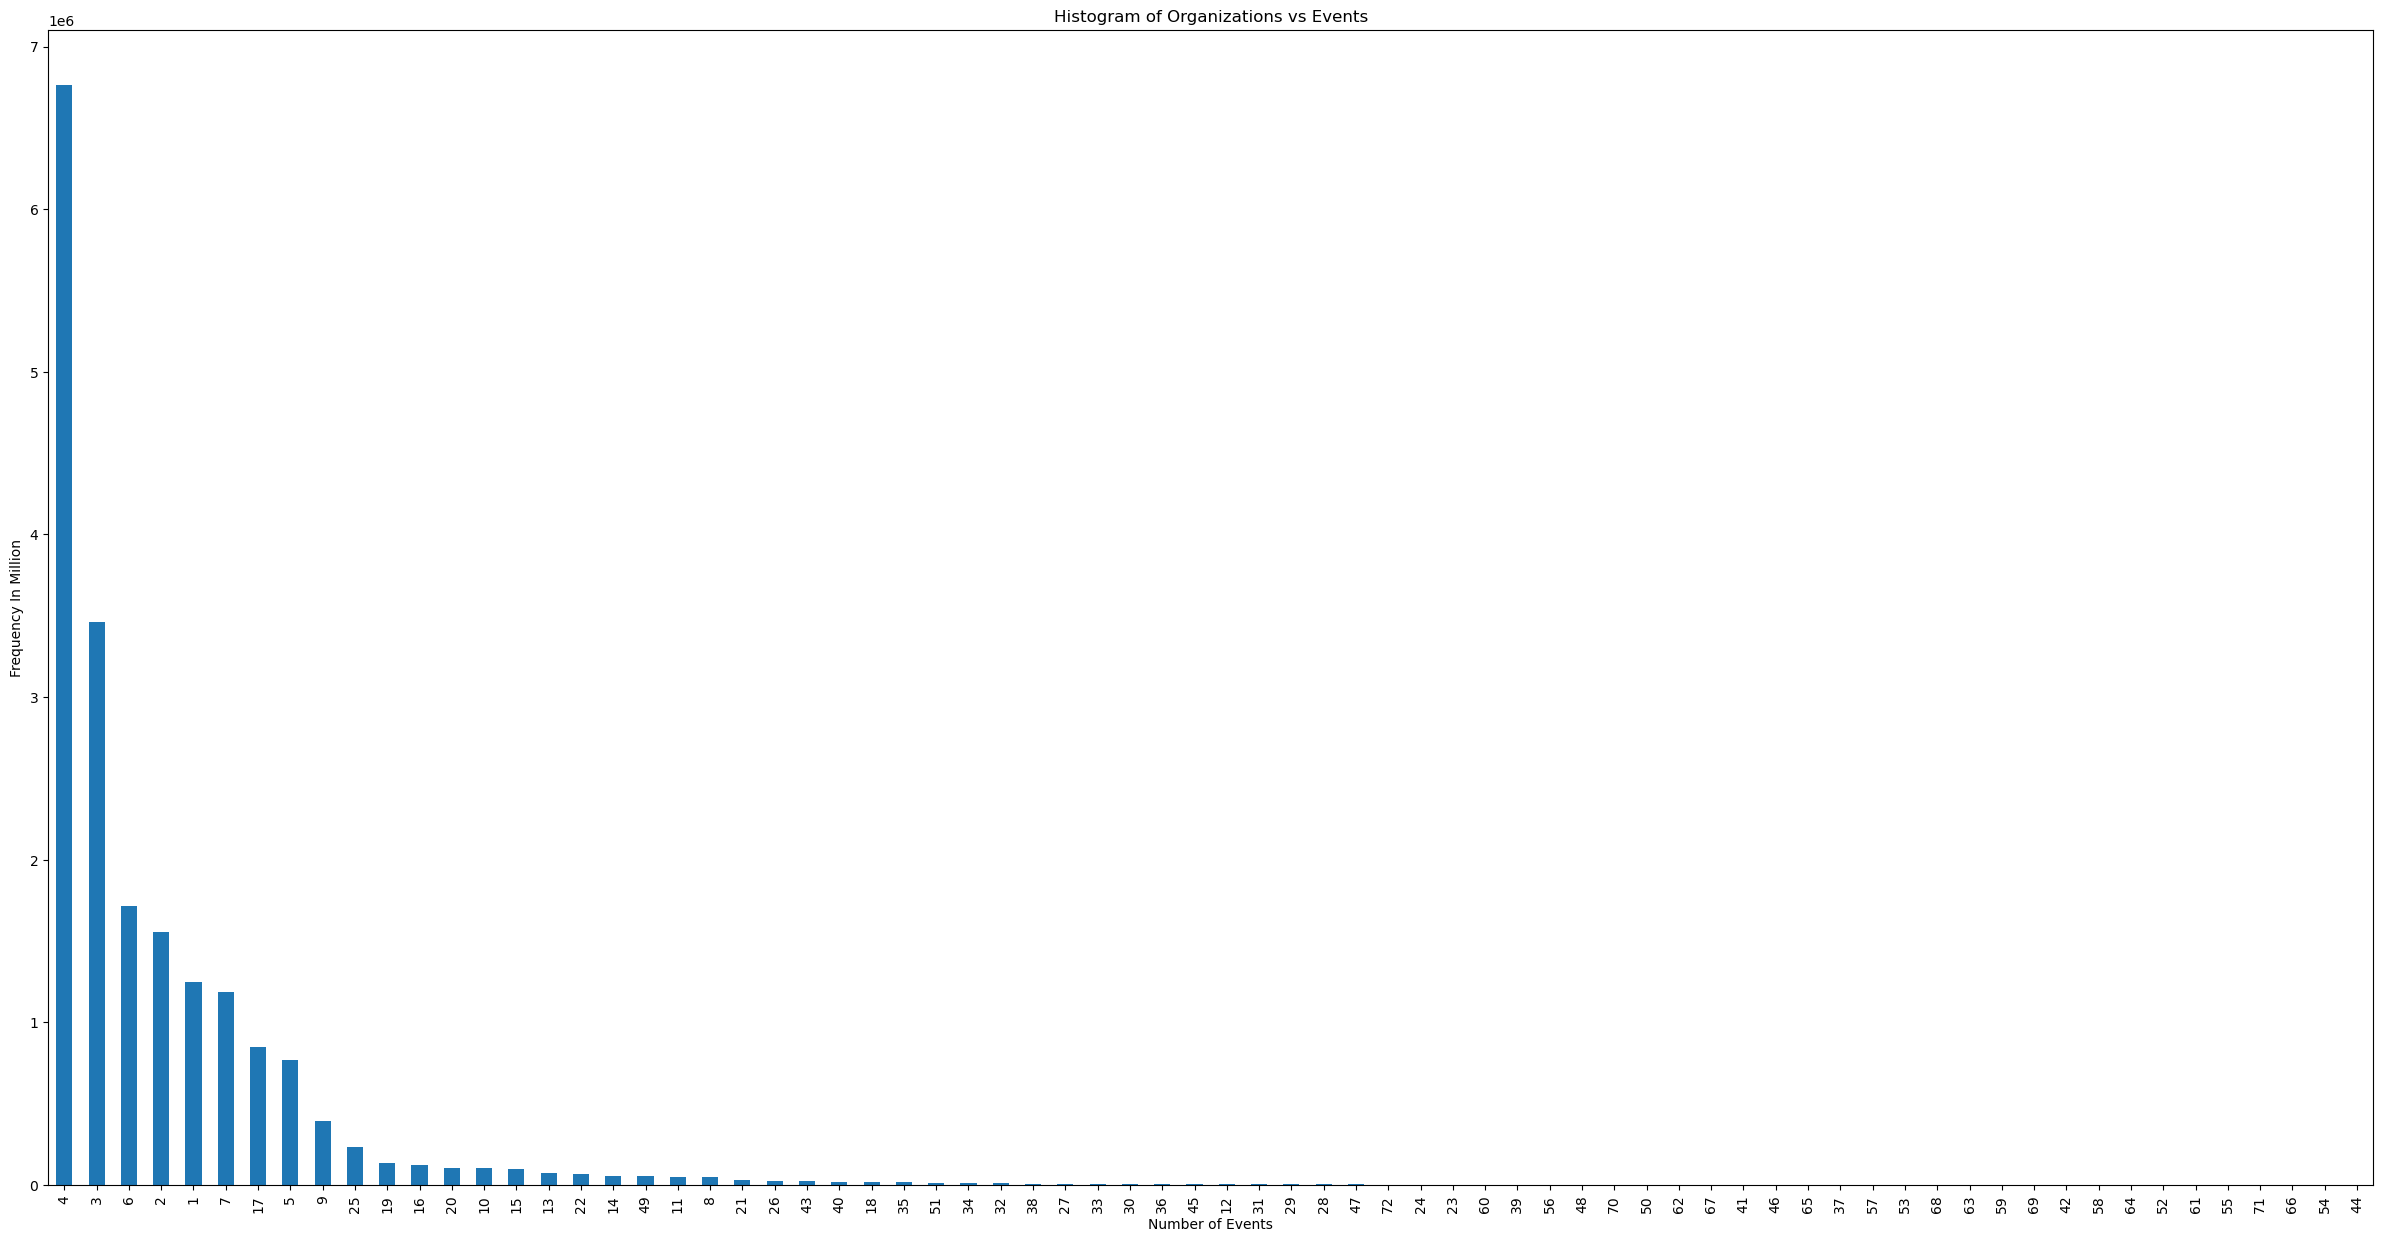

In [4]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter

# Create a histogram plot of urls_counts with a custom figure size
fig, ax = plt.subplots(figsize=(30, 15))
event_counts.plot(kind='bar', ax=ax)

# Add labels and title
ax.set_xlabel('Number of Events')
ax.set_ylabel('Frequency In Million')
ax.set_title('Histogram of Organizations vs Events')

# Format y-axis ticks as whole numbers
ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=True))

# Show the plot
plt.show()

In [5]:
df_2['Timestamp_Req'] = pd.to_datetime(df_2['Timestamp_Req'])

In [6]:
df_2['Req_Date'] = df_2['Timestamp_Req'].dt.date
df_2['Req_Time'] = df_2['Timestamp_Req'].dt.time

In [7]:
df_2['Timestamp_Resp'] = pd.to_datetime(df_2['Timestamp_Resp'])

In [8]:
df_2['Resp_Date'] = df_2['Timestamp_Resp'].dt.date
df_2['Resp_Time'] = df_2['Timestamp_Resp'].dt.time

In [9]:
# Drop rows where "Timestamp_Req" or "Timestamp_Resp" is equal to "2022-11-30"
df_2 = df_2[(df_2["Timestamp_Req"].dt.date != pd.to_datetime("2022-11-30").date()) & (df_2["Timestamp_Resp"].dt.date != pd.to_datetime("2022-11-30").date())]

In [10]:
# Calculate the difference between the time columns
df_2['Time_Diff'] = (pd.to_datetime(df_2['Timestamp_Resp']) - pd.to_datetime(df_2['Timestamp_Req'])).dt.total_seconds()

# View the resulting DataFrame
df_2 = df_2.reset_index(drop=True)

# View the resulting DataFrame
df_2

,Timestamp,EventId,EventTime,IngestTime,SourceIp,HttpMethod,HttpUrl,HttpAuth,Resource,Organization,App,User,Entity,Timestamp_Req,Timestamp_Resp,Req_Date,Req_Time,Resp_Date,Resp_Time,Time_Diff
0,2022-12-01 00:00:06,1AF1EQNQNHAU0R9K61G0MZATE,2022-12-01 00:00:00.451883,2022-12-01 00:00:06.350516900+00:00,3.224.122.159,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 9ffb,DocumentResource.get,1,1,1,1,2022-12-01 00:00:00.309729,2022-12-01 00:00:00.451883,2022-12-01,00:00:00.309729,2022-12-01,00:00:00.451883,0.142154
1,2022-12-01 00:00:06,1FDBK3PZZSNE1DOH9F66DQG4A,2022-12-01 00:00:00.930797,2022-12-01 00:00:06.350519100+00:00,3.224.122.159,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 9ffb,DocumentResource.get,1,1,1,1,2022-12-01 00:00:00.782563,2022-12-01 00:00:00.930797,2022-12-01,00:00:00.782563,2022-12-01,00:00:00.930797,0.148234
2,2022-12-01 00:00:06,HAADEZBCBQ5EETO7RLX1S633,2022-12-01 00:00:01.213392,2022-12-01 00:00:06.350519400+00:00,3.224.122.159,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 9ffb,DocumentResource.get,1,1,1,1,2022-12-01 00:00:01.051775,2022-12-01 00:00:01.213392,2022-12-01,00:00:01.051775,2022-12-01,00:00:01.213392,0.161617
3,2022-12-01 00:00:10,1LJ1E02DHKIASONQ1WWFSIYC5,2022-12-01 00:00:01.723988,2022-12-01 00:00:10.353102100+00:00,3.224.122.159,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 9ffb,DocumentResource.get,1,1,1,1,2022-12-01 00:00:01.612861,2022-12-01 00:00:01.723988,2022-12-01,00:00:01.612861,2022-12-01,00:00:01.723988,0.111127
4,2022-12-01 00:00:10,1085NRTIT6FLPEHZ1MOTDWIQ,2022-12-01 00:00:03.657868,2022-12-01 00:00:10.353102400+00:00,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/37df...,API_KEY 6b50,TaskResource.get,6,6,1,6,2022-12-01 00:00:03.656532,2022-12-01 00:00:03.657868,2022-12-01,00:00:03.656532,2022-12-01,00:00:03.657868,0.001336
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19338385,2022-12-31 23:59:54,XGEC68C3KQ9017A3N16DB3P1I,2022-12-31 23:59:40.224704,2022-12-31 23:59:54.398126800+00:00,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/37df...,API_KEY 6b50,TaskResource.get,6,6,1,6,2022-12-31 23:59:40.038094,2022-12-31 23:59:40.224704,2022-12-31,23:59:40.038094,2022-12-31,23:59:40.224704,0.186610
19338386,2022-12-31 23:59:54,YX5I4VILN01XV8EWGEWVGA3F,2022-12-31 23:59:40.377471,2022-12-31 23:59:54.398127100+00:00,194.79.66.193,GET,https://api.docdigitizer.com/api/v1/tasks/5b06...,API_KEY 5b2c,TaskResource.get,4,4,1,4,2022-12-31 23:59:40.273040,2022-12-31 23:59:40.377471,2022-12-31,23:59:40.273040,2022-12-31,23:59:40.377471,0.104431
19338387,2022-12-31 23:59:54,YHBMED1FP7TB1NM72TESD4QGQ,2022-12-31 23:59:42.088731,2022-12-31 23:59:54.398127400+00:00,193.36.190.25,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY e94b,DocumentResource.get,5,5,1,5,2022-12-31 23:59:41.895006,2022-12-31 23:59:42.088731,2022-12-31,23:59:41.895006,2022-12-31,23:59:42.088731,0.193725
19338388,2022-12-31 23:59:54,1P5KC2V9491J31LQZ0KXV4TRGV,2022-12-31 23:59:34.779324,2022-12-31 23:59:54.398119400+00:00,194.79.66.193,GET,https://api.docdigitizer.com/api/v1/tasks/b7e5...,API_KEY 5b2c,TaskResource.get,4,4,1,4,2022-12-31 23:59:34.680097,2022-12-31 23:59:34.779324,2022-12-31,23:59:34.680097,2022-12-31,23:59:34.779324,0.099227


In [11]:
# Convert datetime to weekday
df_2['Weekday'] = df_2['Timestamp_Req'].dt.day_name()

# Create a new column 'hour' that contains the hour component of 'timestamp_req'
df_2['Hour'] = df_2['Timestamp_Req'].dt.hour

# View the Dataframe
df_2

,Timestamp,EventId,EventTime,IngestTime,SourceIp,HttpMethod,HttpUrl,HttpAuth,Resource,Organization,...,Entity,Timestamp_Req,Timestamp_Resp,Req_Date,Req_Time,Resp_Date,Resp_Time,Time_Diff,Weekday,Hour
0,2022-12-01 00:00:06,1AF1EQNQNHAU0R9K61G0MZATE,2022-12-01 00:00:00.451883,2022-12-01 00:00:06.350516900+00:00,3.224.122.159,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 9ffb,DocumentResource.get,1,...,1,2022-12-01 00:00:00.309729,2022-12-01 00:00:00.451883,2022-12-01,00:00:00.309729,2022-12-01,00:00:00.451883,0.142154,Thursday,0
1,2022-12-01 00:00:06,1FDBK3PZZSNE1DOH9F66DQG4A,2022-12-01 00:00:00.930797,2022-12-01 00:00:06.350519100+00:00,3.224.122.159,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 9ffb,DocumentResource.get,1,...,1,2022-12-01 00:00:00.782563,2022-12-01 00:00:00.930797,2022-12-01,00:00:00.782563,2022-12-01,00:00:00.930797,0.148234,Thursday,0
2,2022-12-01 00:00:06,HAADEZBCBQ5EETO7RLX1S633,2022-12-01 00:00:01.213392,2022-12-01 00:00:06.350519400+00:00,3.224.122.159,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 9ffb,DocumentResource.get,1,...,1,2022-12-01 00:00:01.051775,2022-12-01 00:00:01.213392,2022-12-01,00:00:01.051775,2022-12-01,00:00:01.213392,0.161617,Thursday,0
3,2022-12-01 00:00:10,1LJ1E02DHKIASONQ1WWFSIYC5,2022-12-01 00:00:01.723988,2022-12-01 00:00:10.353102100+00:00,3.224.122.159,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 9ffb,DocumentResource.get,1,...,1,2022-12-01 00:00:01.612861,2022-12-01 00:00:01.723988,2022-12-01,00:00:01.612861,2022-12-01,00:00:01.723988,0.111127,Thursday,0
4,2022-12-01 00:00:10,1085NRTIT6FLPEHZ1MOTDWIQ,2022-12-01 00:00:03.657868,2022-12-01 00:00:10.353102400+00:00,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/37df...,API_KEY 6b50,TaskResource.get,6,...,6,2022-12-01 00:00:03.656532,2022-12-01 00:00:03.657868,2022-12-01,00:00:03.656532,2022-12-01,00:00:03.657868,0.001336,Thursday,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19338385,2022-12-31 23:59:54,XGEC68C3KQ9017A3N16DB3P1I,2022-12-31 23:59:40.224704,2022-12-31 23:59:54.398126800+00:00,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/37df...,API_KEY 6b50,TaskResource.get,6,...,6,2022-12-31 23:59:40.038094,2022-12-31 23:59:40.224704,2022-12-31,23:59:40.038094,2022-12-31,23:59:40.224704,0.186610,Saturday,23
19338386,2022-12-31 23:59:54,YX5I4VILN01XV8EWGEWVGA3F,2022-12-31 23:59:40.377471,2022-12-31 23:59:54.398127100+00:00,194.79.66.193,GET,https://api.docdigitizer.com/api/v1/tasks/5b06...,API_KEY 5b2c,TaskResource.get,4,...,4,2022-12-31 23:59:40.273040,2022-12-31 23:59:40.377471,2022-12-31,23:59:40.273040,2022-12-31,23:59:40.377471,0.104431,Saturday,23
19338387,2022-12-31 23:59:54,YHBMED1FP7TB1NM72TESD4QGQ,2022-12-31 23:59:42.088731,2022-12-31 23:59:54.398127400+00:00,193.36.190.25,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY e94b,DocumentResource.get,5,...,5,2022-12-31 23:59:41.895006,2022-12-31 23:59:42.088731,2022-12-31,23:59:41.895006,2022-12-31,23:59:42.088731,0.193725,Saturday,23
19338388,2022-12-31 23:59:54,1P5KC2V9491J31LQZ0KXV4TRGV,2022-12-31 23:59:34.779324,2022-12-31 23:59:54.398119400+00:00,194.79.66.193,GET,https://api.docdigitizer.com/api/v1/tasks/b7e5...,API_KEY 5b2c,TaskResource.get,4,...,4,2022-12-31 23:59:34.680097,2022-12-31 23:59:34.779324,2022-12-31,23:59:34.680097,2022-12-31,23:59:34.779324,0.099227,Saturday,23


In [12]:
Time = df_2.groupby('Resp_Date')['EventId'].count()
Time_df1 = df_2.groupby('Resp_Date')['Time_Diff'].sum()

In [13]:
# Merge the two dfs
Time_DF = pd.merge(Time, Time_df1, on='Resp_Date')

# print the merged dataframe
Time_DF = Time_DF.reset_index()
Time_DF

,Resp_Date,EventId,Time_Diff
0,2022-12-01,643050,72414.659128
1,2022-12-02,672121,108726.433012
2,2022-12-03,880858,160425.090713
3,2022-12-04,901844,166694.610224
4,2022-12-05,767791,167249.451883
5,2022-12-06,645504,94276.365389
6,2022-12-07,653364,79388.955911
7,2022-12-08,367833,43471.424739
8,2022-12-09,338292,47609.396791
9,2022-12-10,324148,32236.723200


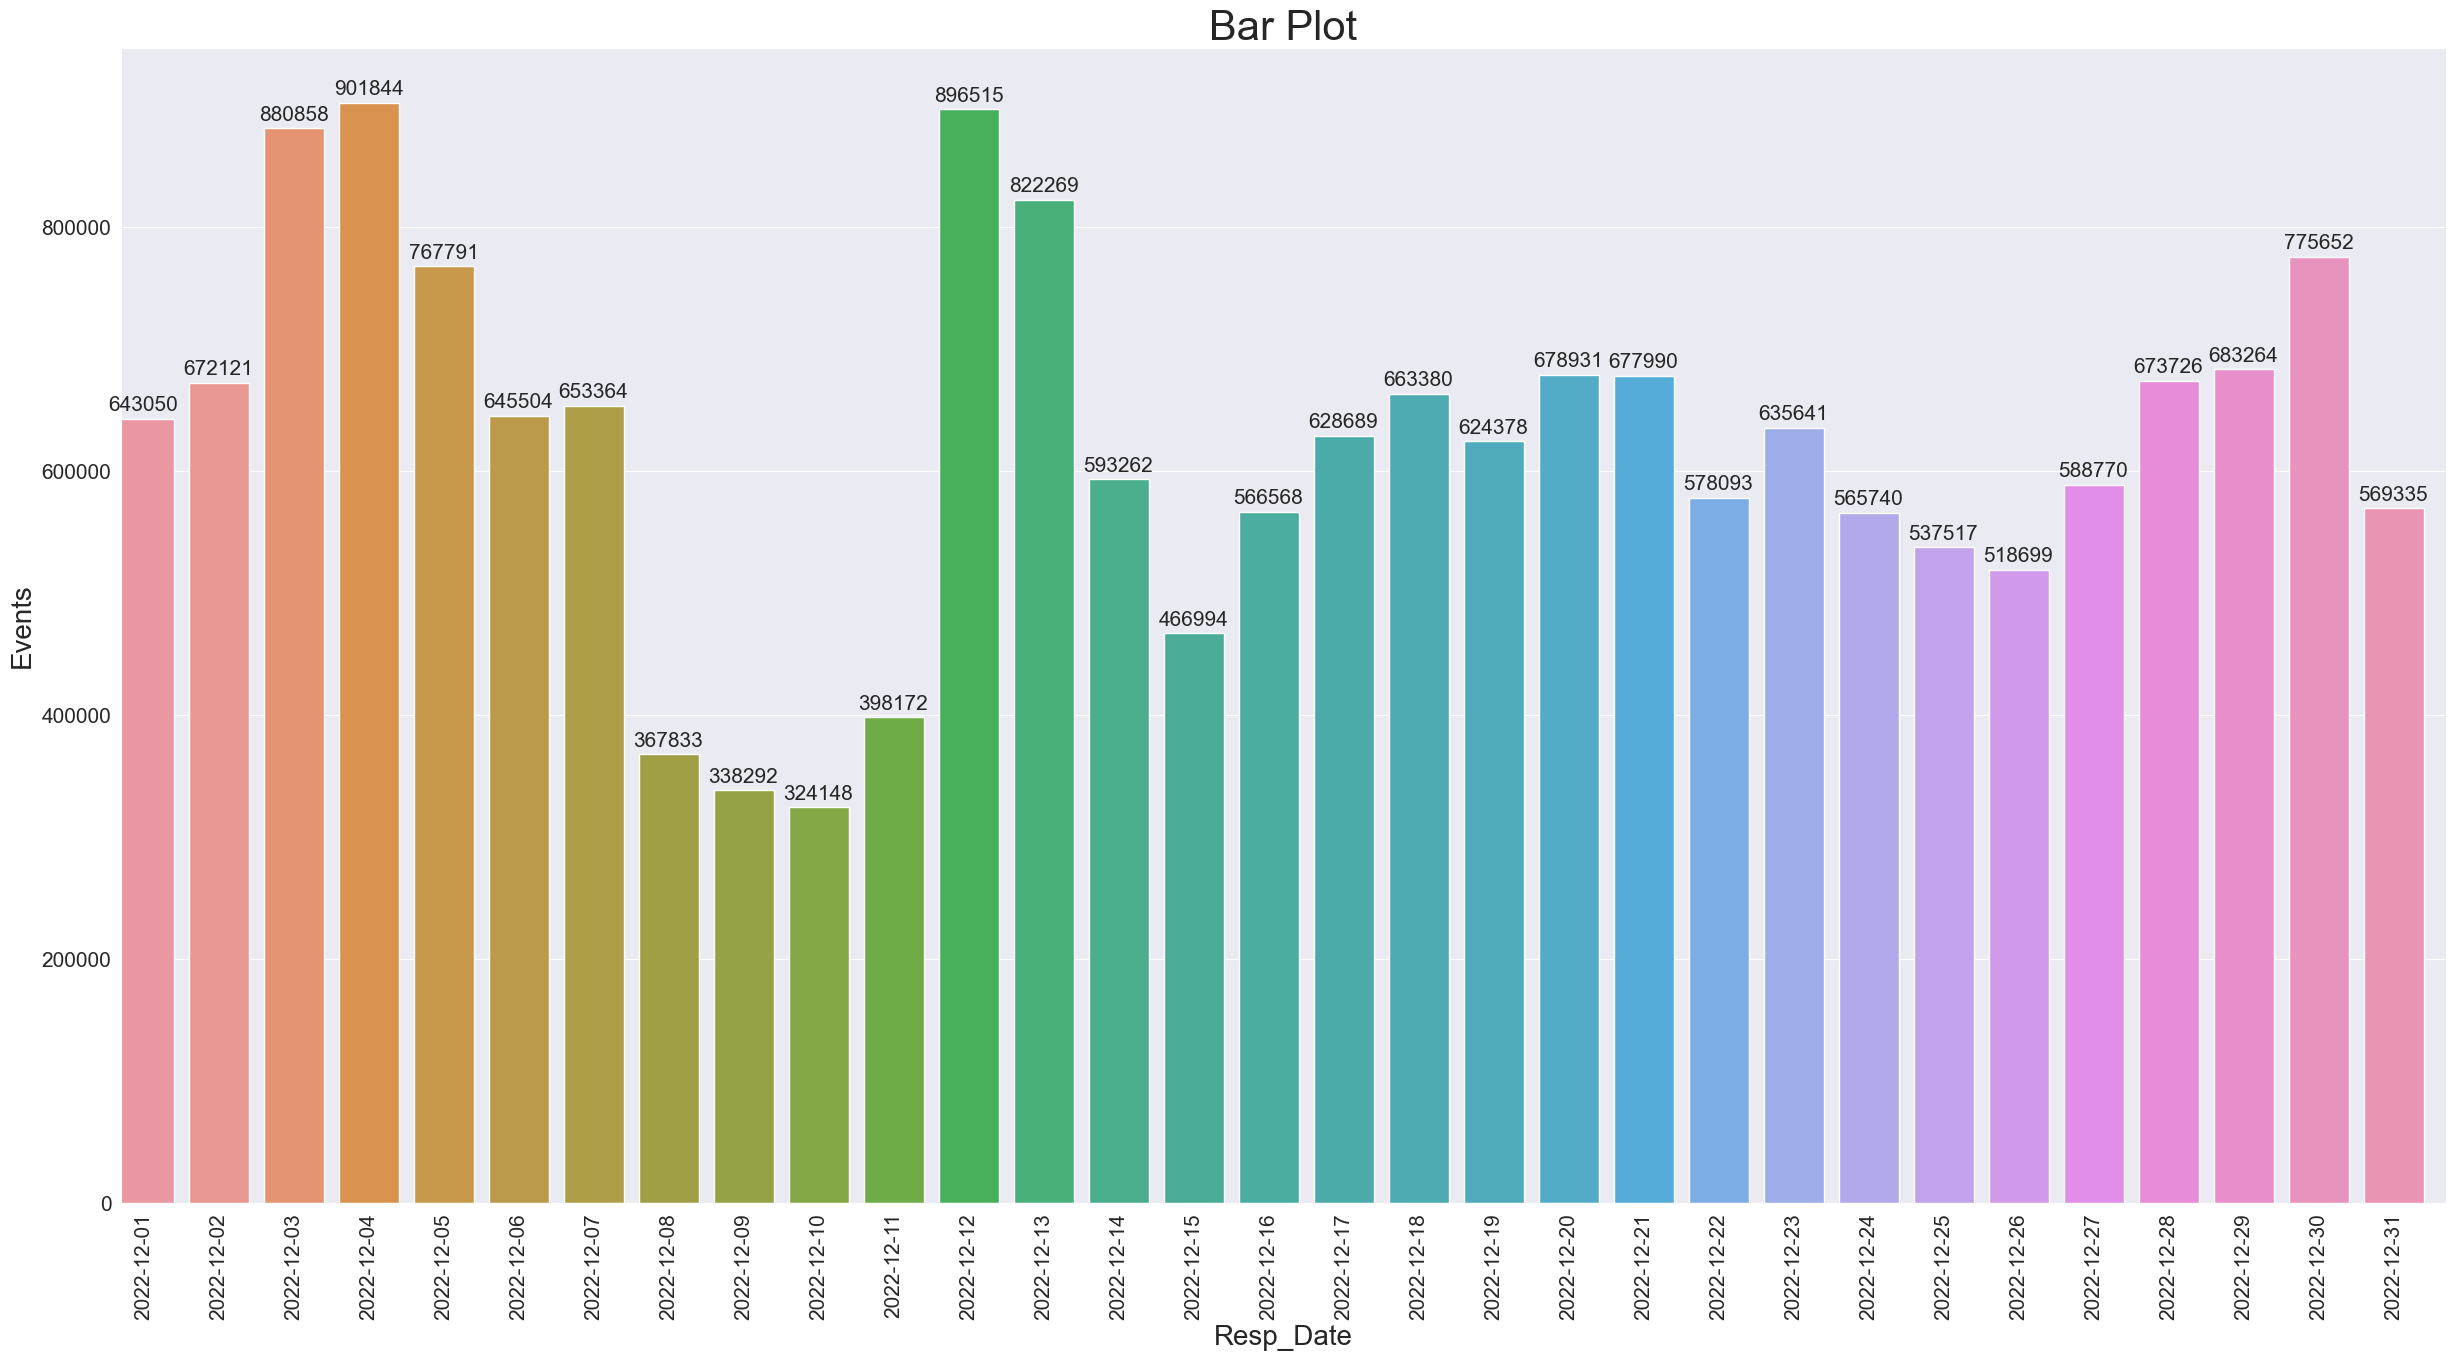

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set_style("darkgrid")

# Plot bar plot
plt.figure(figsize=(30, 15))
ax = sns.barplot(data=Time_DF, x='Resp_Date', y='EventId', dodge=False)

# Set manual bar width
width = 0.3

# Set bar alignment
ax.set_xlim(-width, len(Time_DF['Resp_Date']) - width)
plt.xticks(rotation=90, fontsize = 15)
plt.yticks(fontsize = 15)

# Add labels and title
plt.xlabel('Resp_Date', fontsize = 20)
plt.ylabel('Events', fontsize = 20)
plt.title('Bar Plot', fontsize = 30)

# Add values on top of bars
for patch in ax.patches:
    height = patch.get_height()
    ax.annotate(f'{int(height)}', xy=(patch.get_x() + patch.get_width() / 2, height),
                xytext=(0, 3), textcoords='offset points',
                ha='center', va='bottom',fontsize=15)

# Show the plot
plt.show()

In [15]:
Time1 = df_2.groupby('Organization')['EventId'].count().reset_index(name='Events')
Time1

,Organization,Events
0,1,1247955
1,2,1557767
2,3,3459300
3,4,6763620
4,5,768549
...,...,...
67,68,58
68,69,43
69,70,976
70,71,7


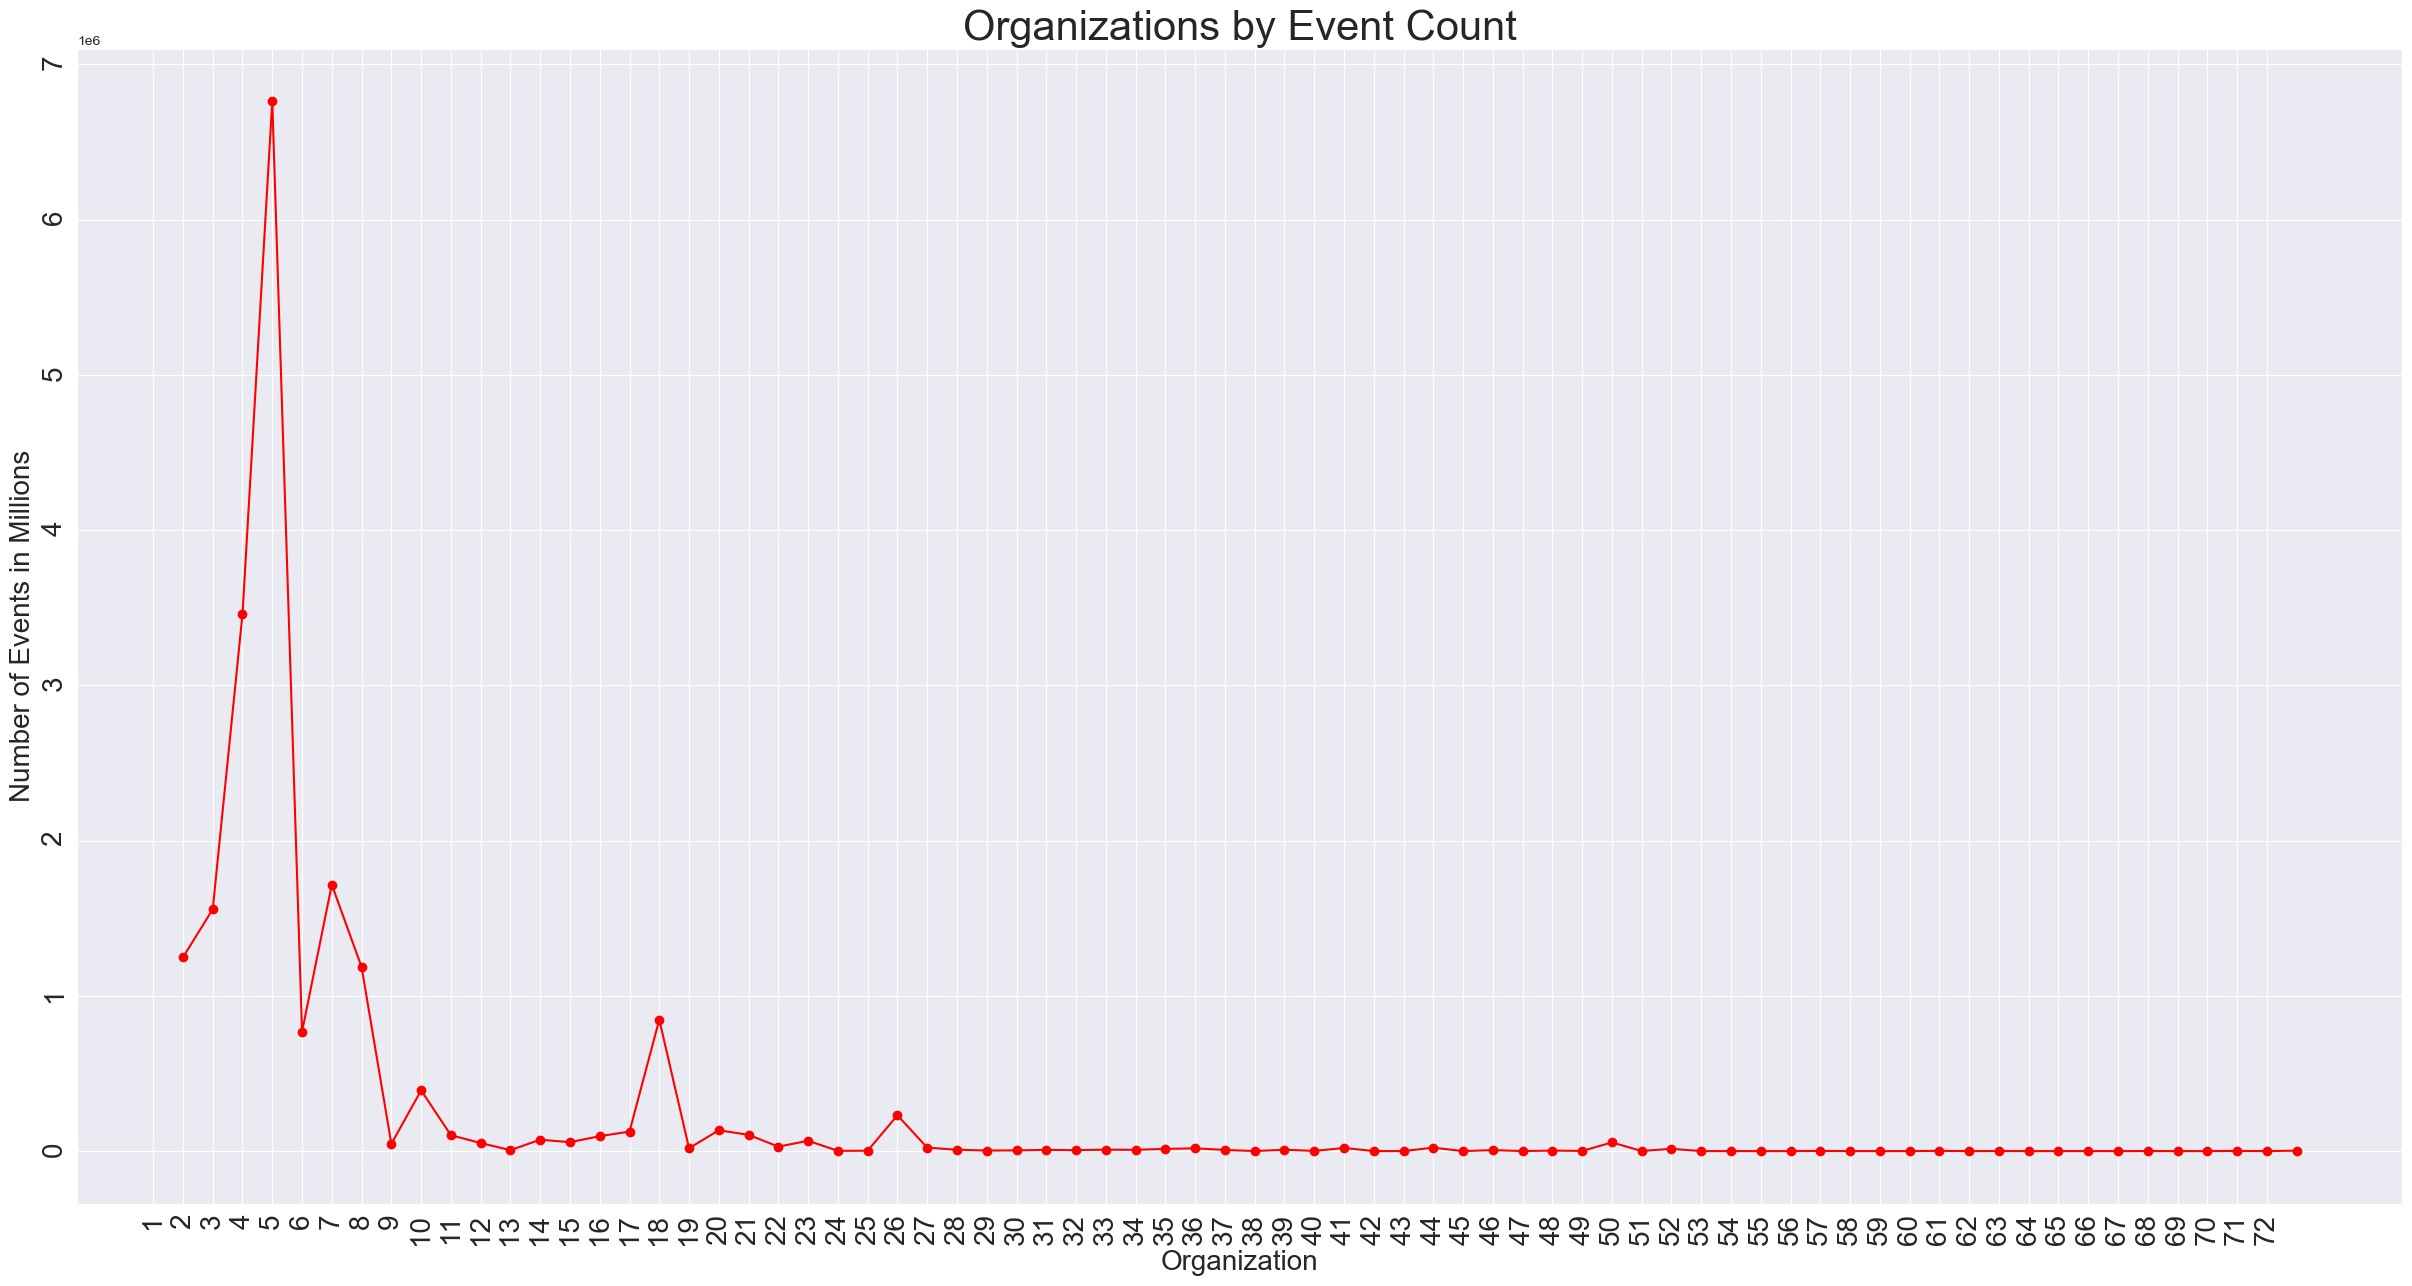

In [16]:
import matplotlib.pyplot as plt

# Increase the figure size
plt.figure(figsize=(30, 15))

# Create the line plot
plt.plot(Time1['Organization'], Time1['Events'], marker='o', linestyle='-', color='red')

# Set the x-axis label
plt.xlabel('Organization',fontsize=20)

# Set the y-axis label
plt.ylabel('Number of Events in Millions',fontsize=20)

# Set the plot title
plt.title('Organizations by Event Count',fontsize = 30)

# Rotate x-axis labels if needed and display all values
plt.xticks(rotation=90,fontsize = 20)
plt.yticks(rotation=90,fontsize = 20)
plt.xticks(range(len(Time1['Organization'])), Time1['Organization'])

# Display the plot
plt.show()


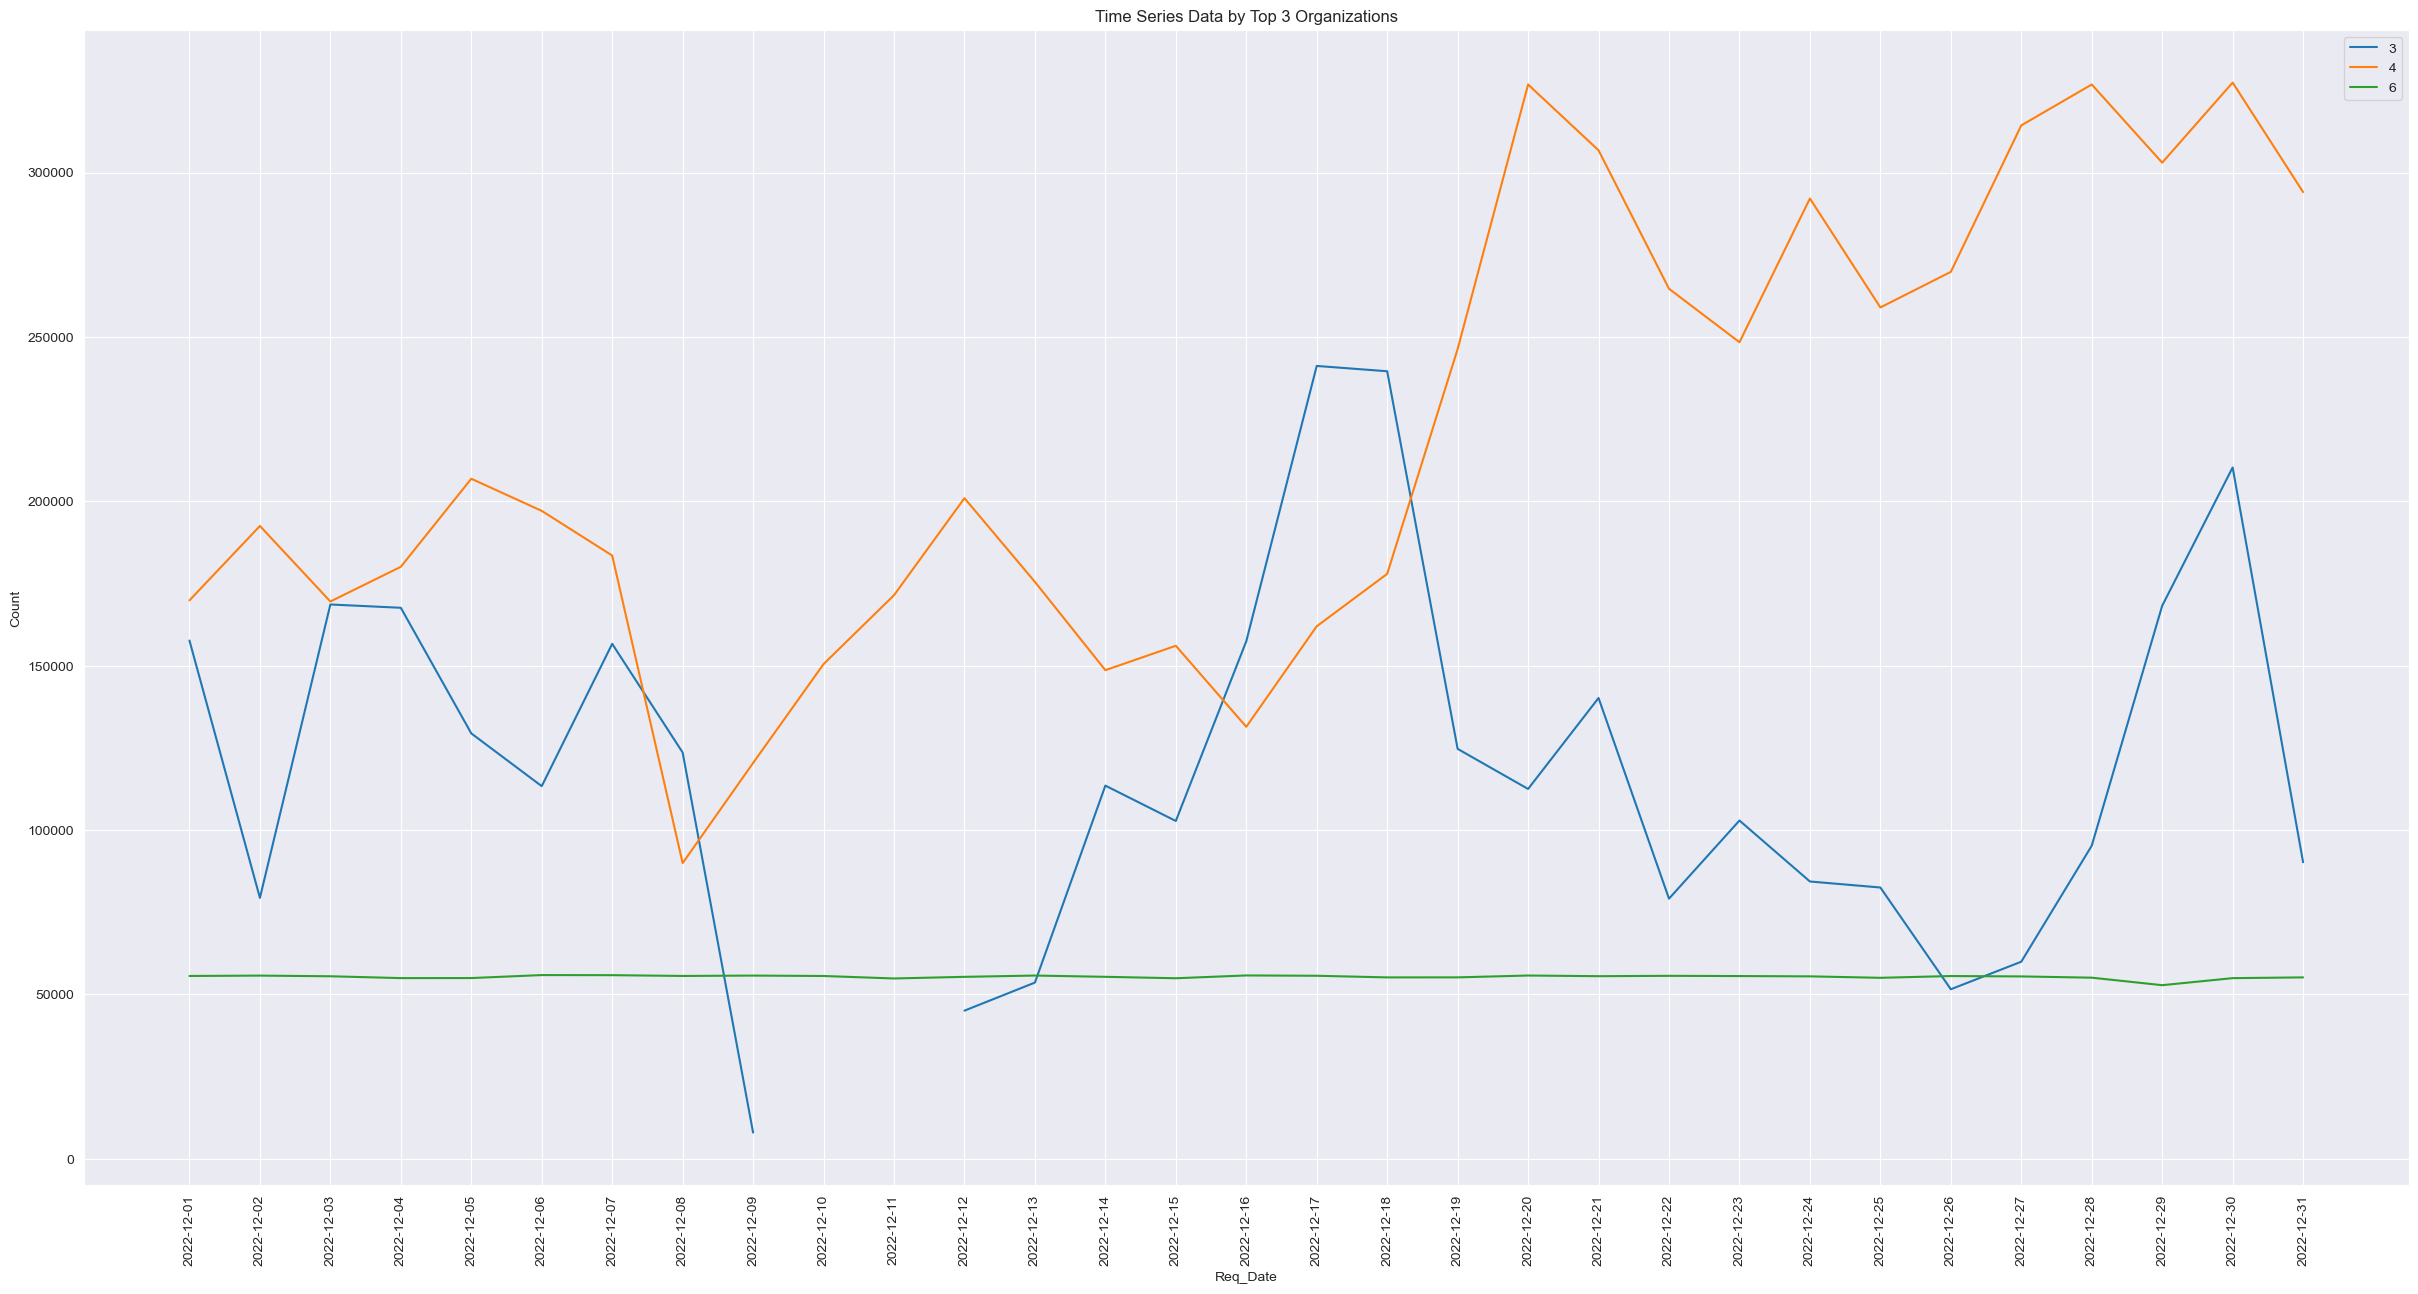

In [17]:
count_data = df_2.groupby(['Req_Date', 'Organization']).size().sort_values(ascending=False).reset_index(name='Count')
pivot_data = count_data.pivot(index='Req_Date', columns='Organization', values='Count')

top_organizations = count_data.groupby('Organization')['Count'].sum().nlargest(3).index
filtered_data = count_data[count_data['Organization'].isin(top_organizations)]

# Pivot the data to have 'Organization' as columns and 'timestamp_resp' as index
pivot_data = filtered_data.pivot(index='Req_Date', columns='Organization', values='Count')

# Plot the time series for each organization
plt.figure(figsize=(30, 15))
for organization in pivot_data.columns:
    plt.plot(pivot_data.index, pivot_data[organization], label=str(organization))

plt.xticks(pivot_data.index, rotation=90)
plt.xlabel('Req_Date')
plt.ylabel('Count')
plt.title('Time Series Data by Top 3 Organizations')
plt.legend()
plt.show()


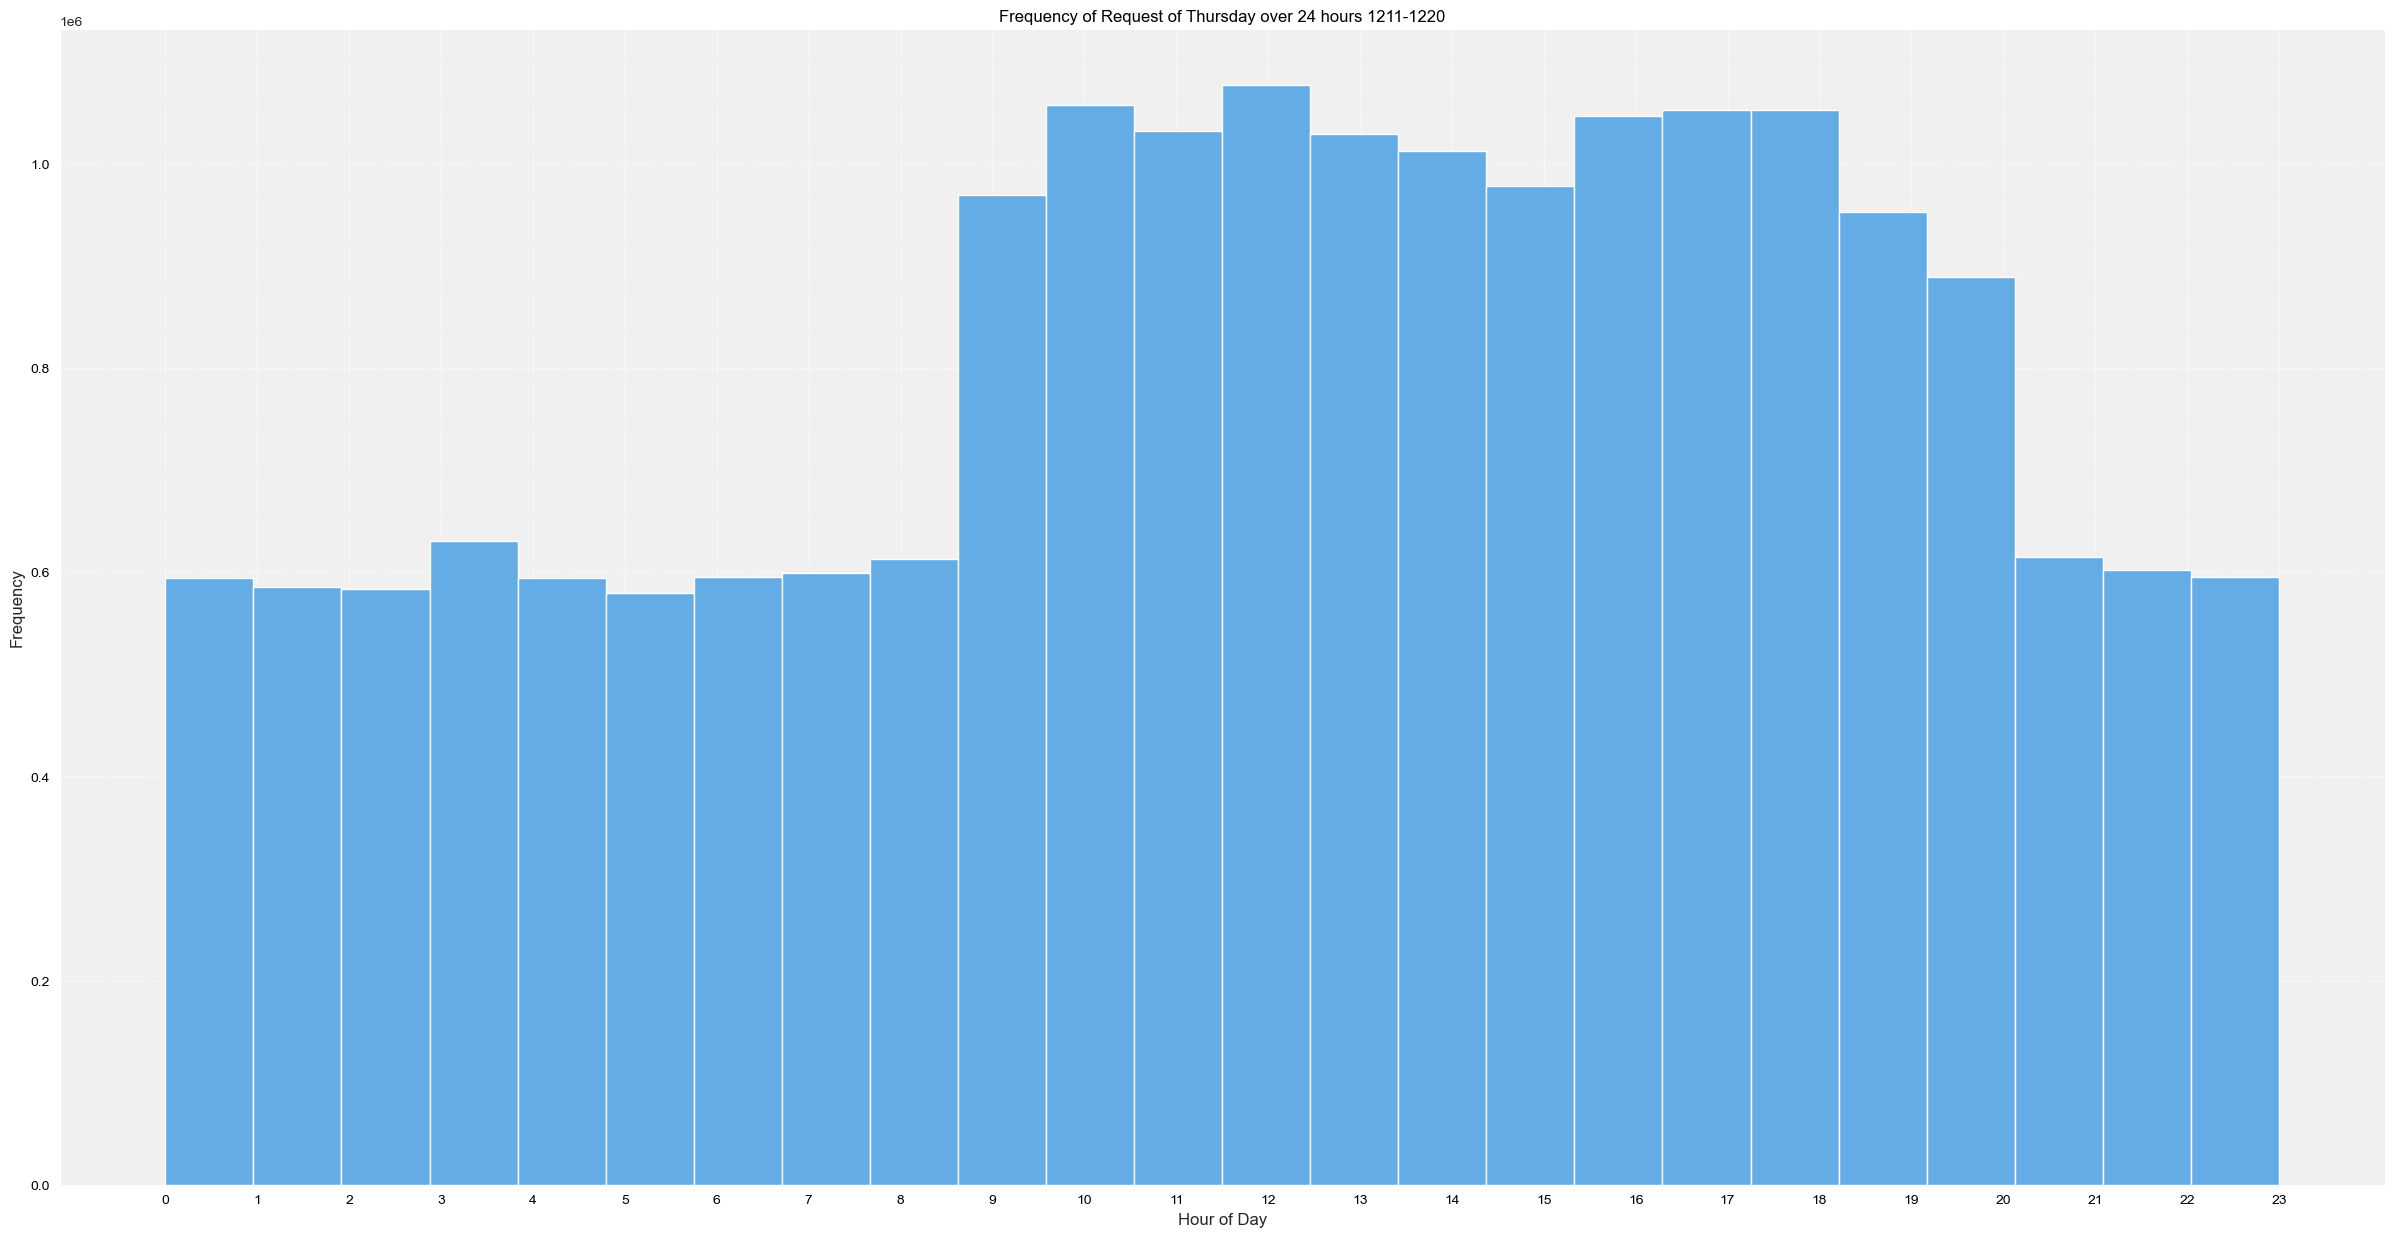

In [18]:
# Extract the hour from the timestamp_req column
hour4 = df_2['Timestamp_Req'].dt.hour

# Set the color palette
color = '#63ace5'

# Set the figure size
plt.figure(figsize=(30, 15))

# Create a histogram
plt.hist(hour4, bins=24, color=color, edgecolor='white')

# Customize the plot
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Frequency of Request of Thursday over 24 hours', fontsize=14)
plt.xticks(range(24))
plt.grid(True, linestyle='--', linewidth=0.5)

# Remove spines
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Add a background color
plt.gca().set_facecolor('#F0F0F0')

# Set the axis labels and title color
plt.setp(plt.gca().get_xticklabels(), color='black')
plt.setp(plt.gca().get_yticklabels(), color='black')
plt.title('Frequency of Request of Thursday over 24 hours 1211-1220', color='black')

# Show the plot
plt.show()

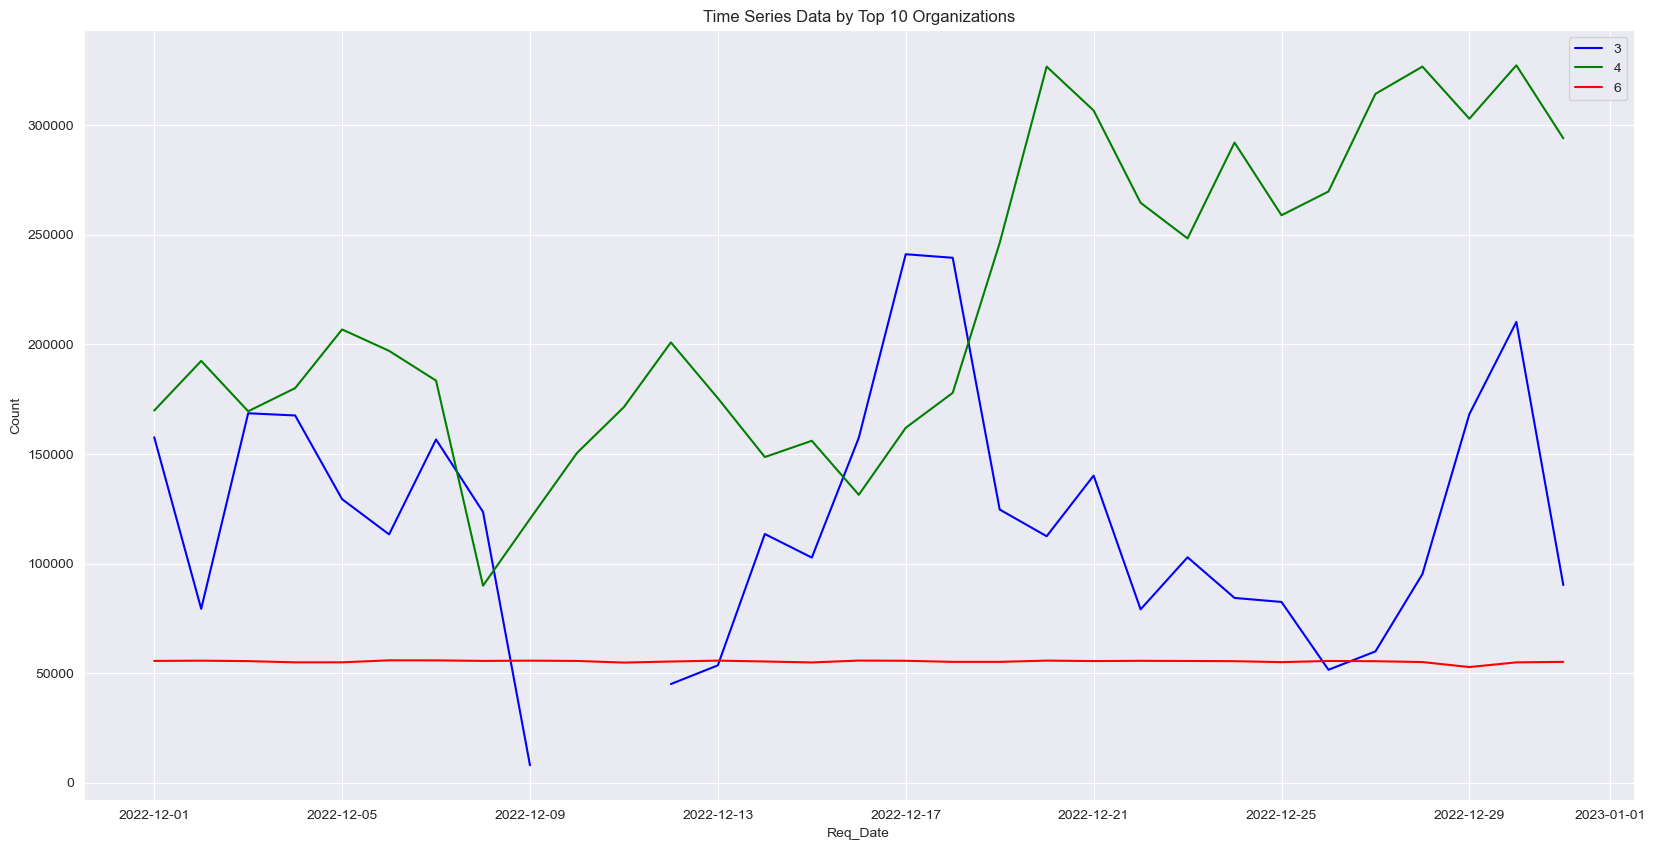

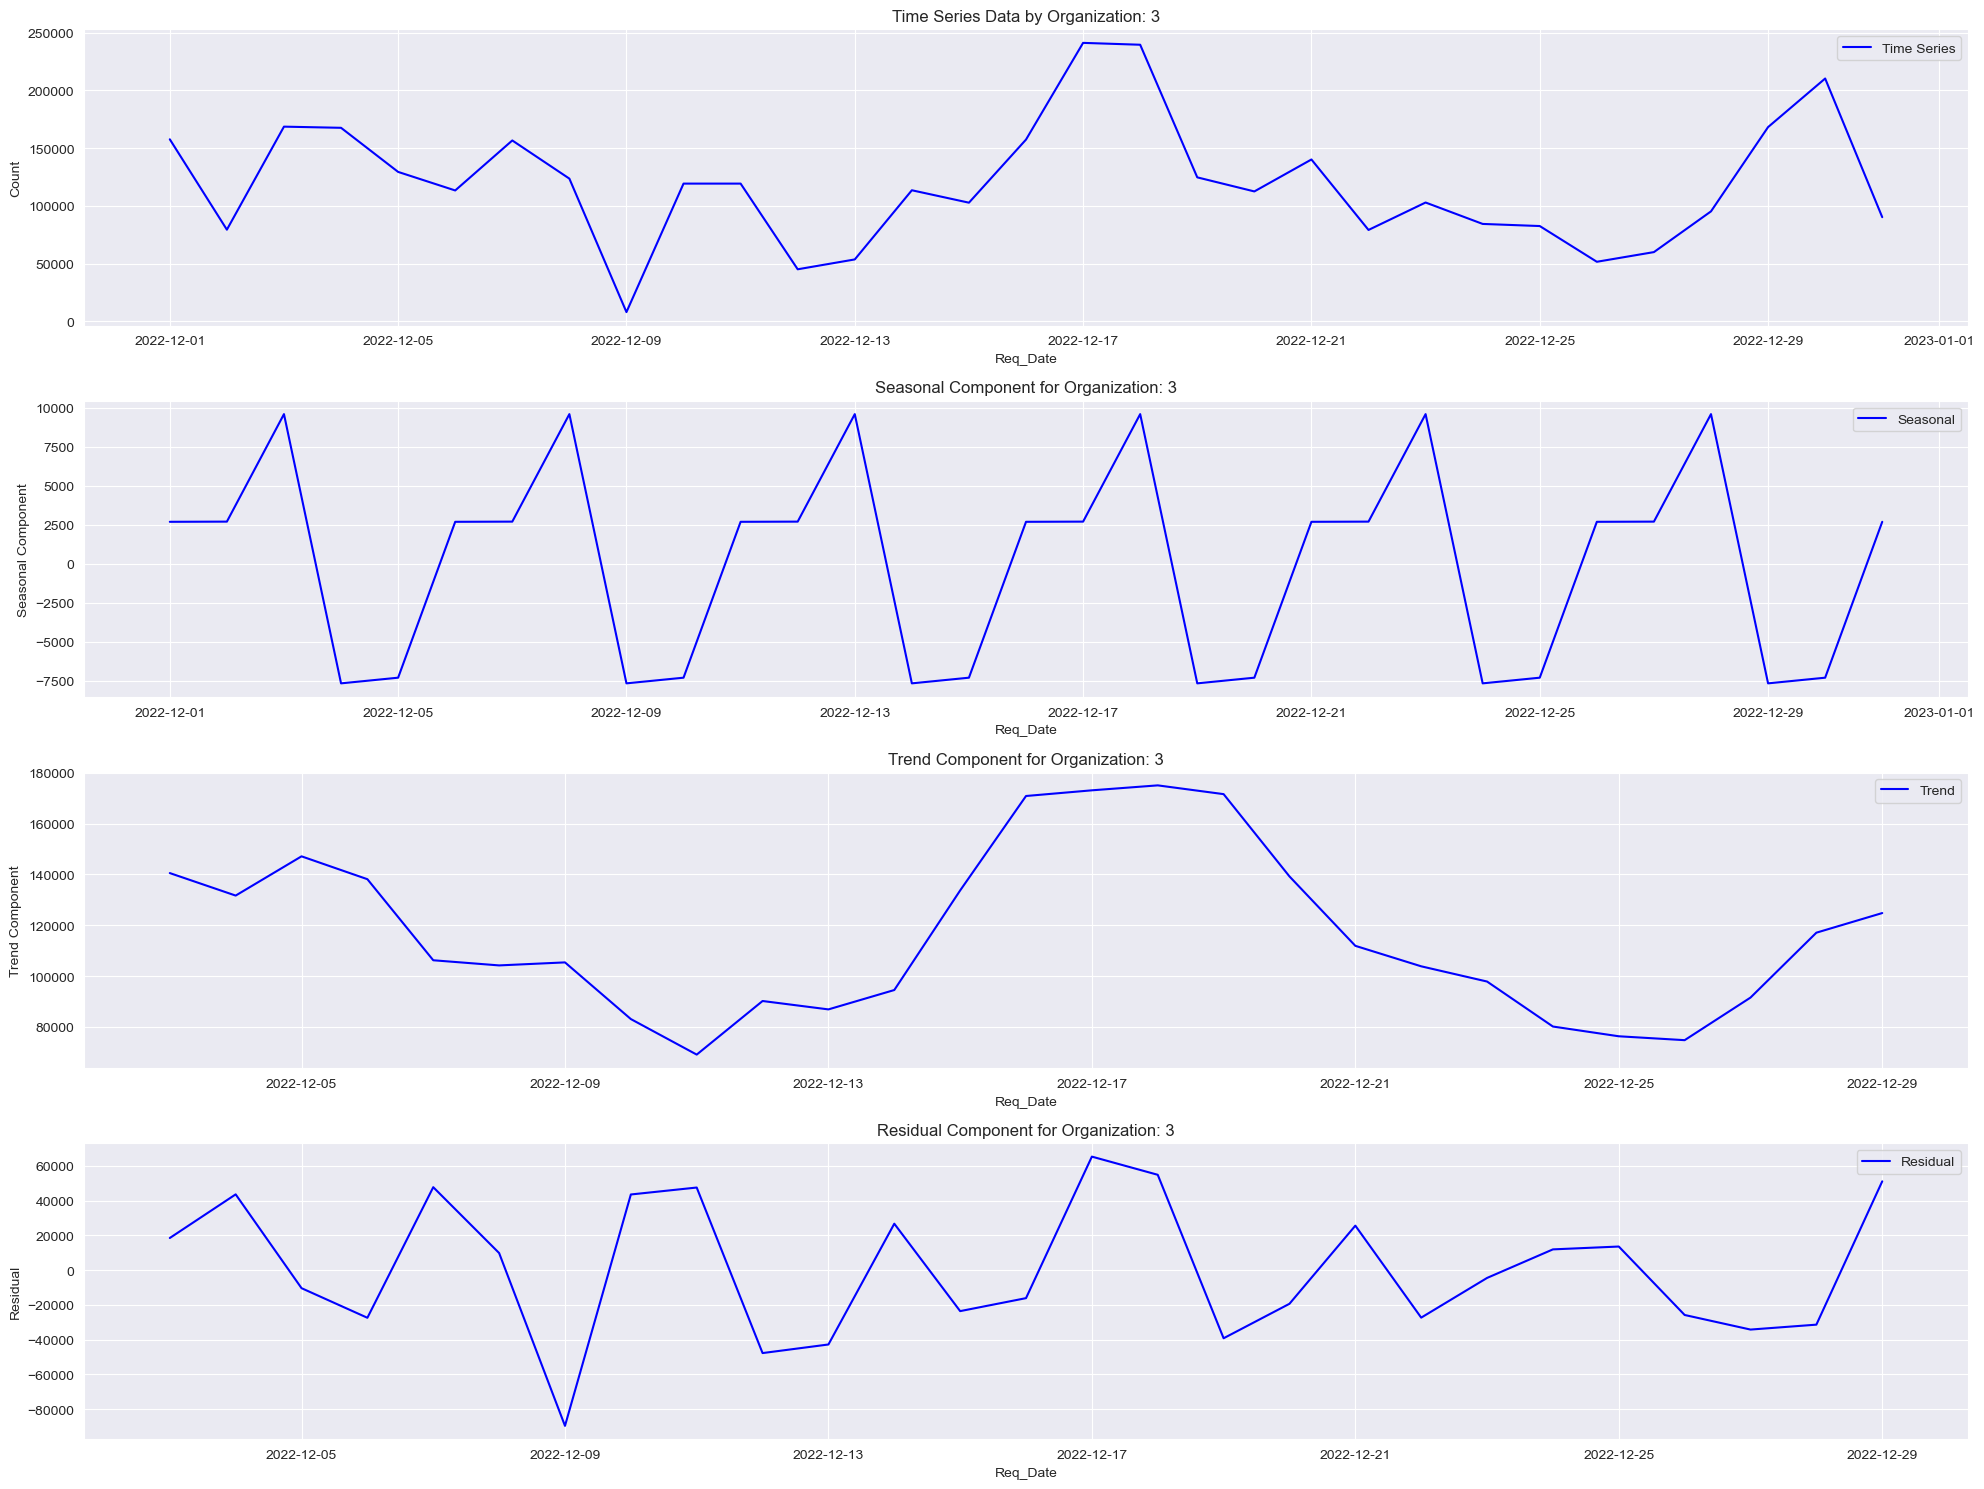

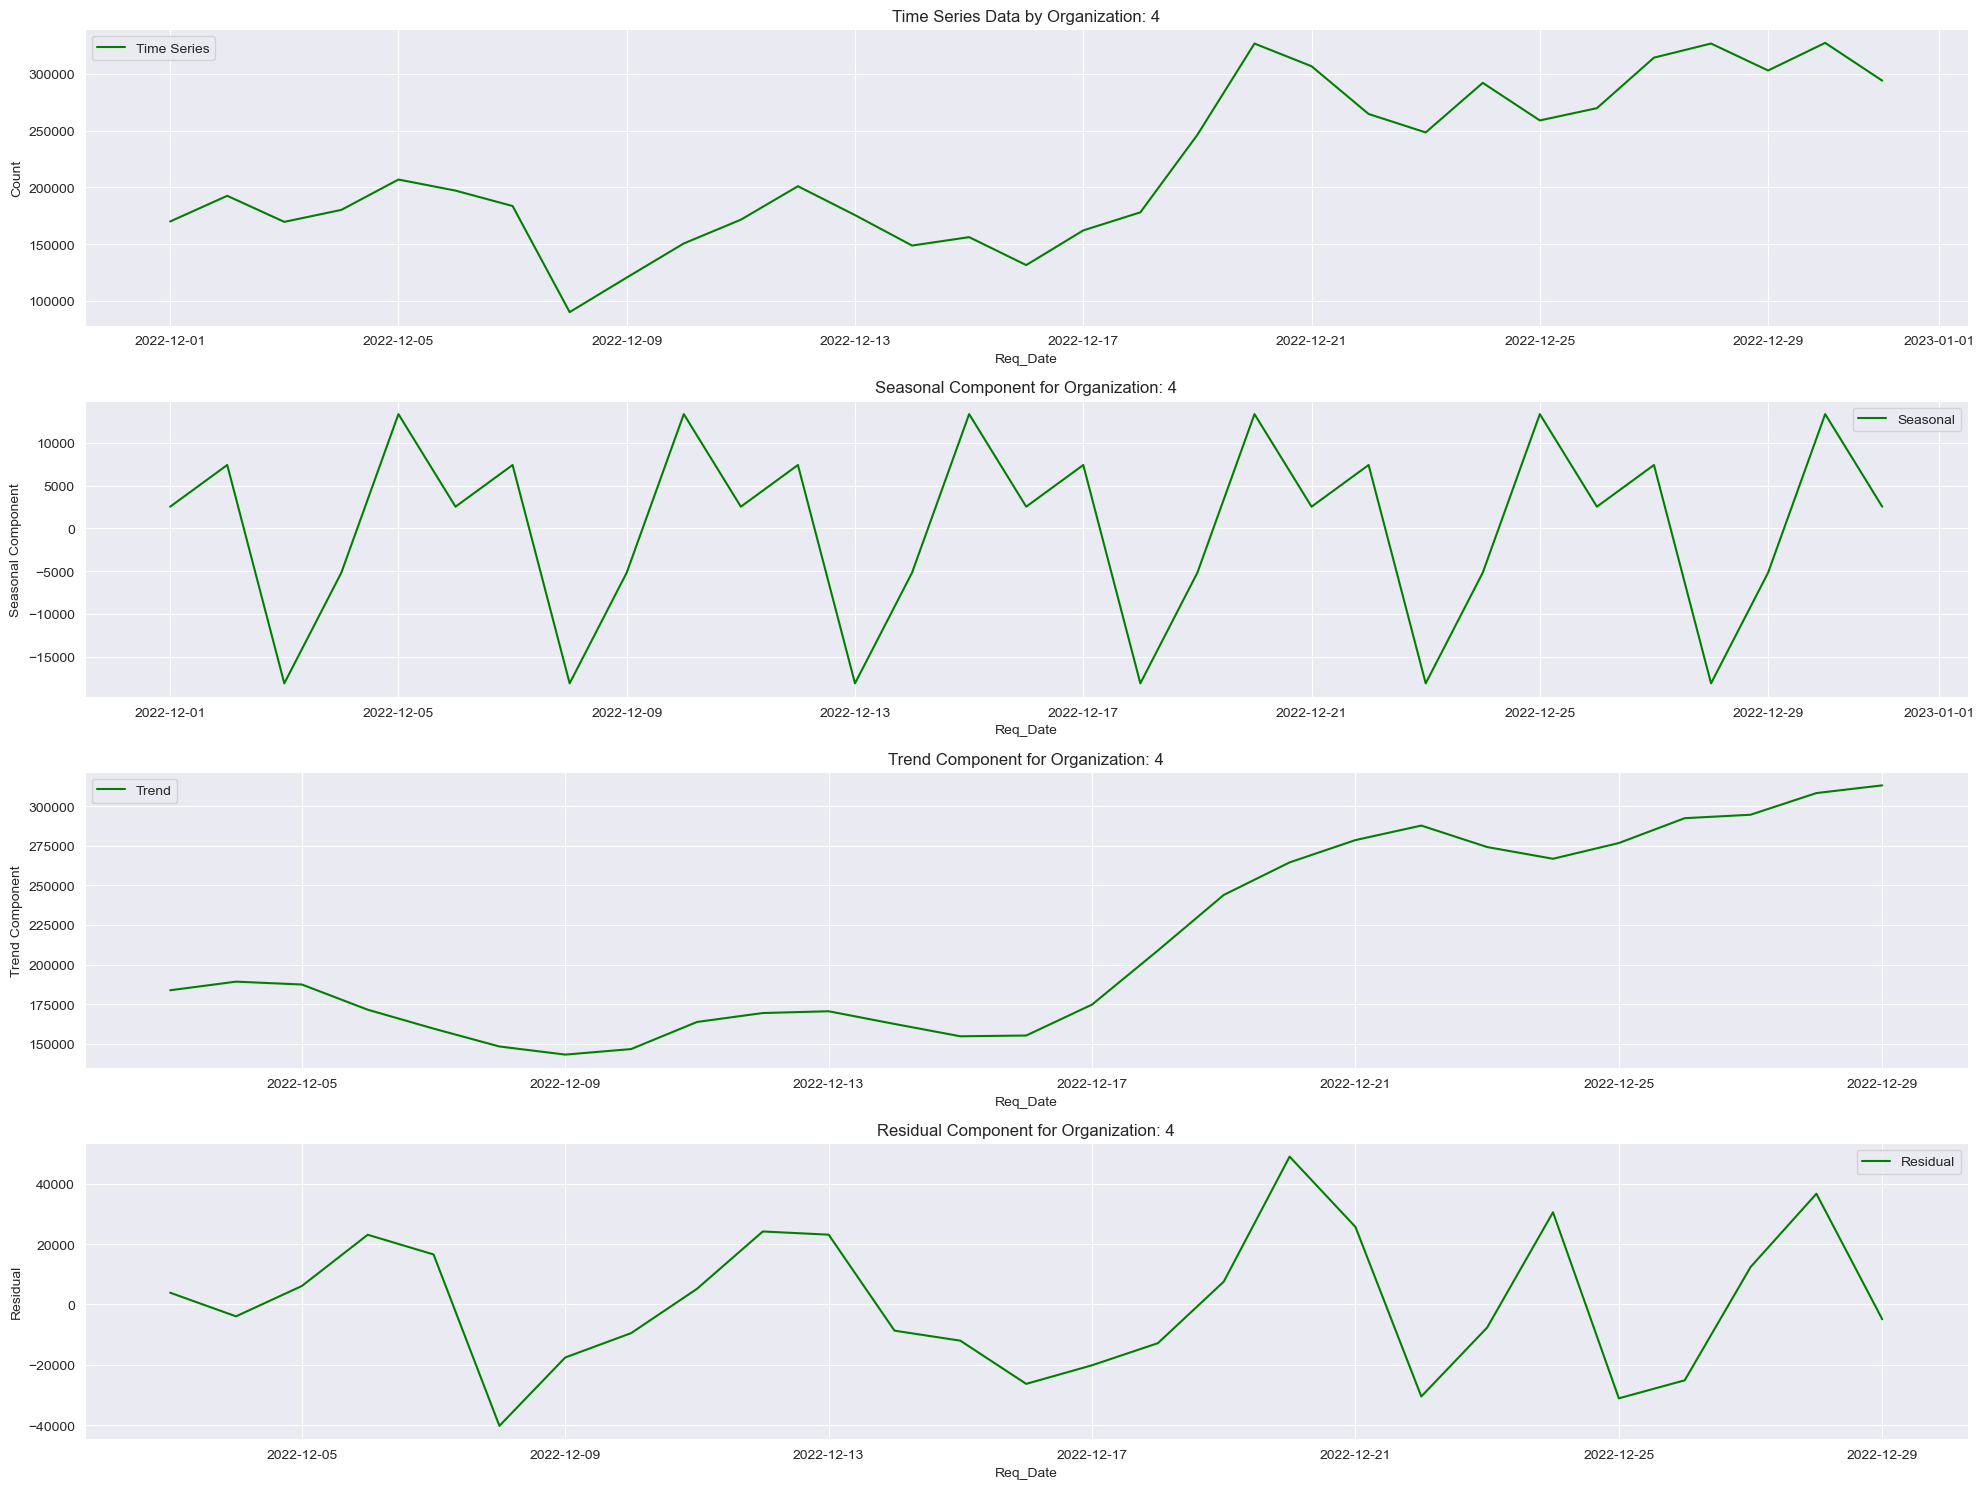

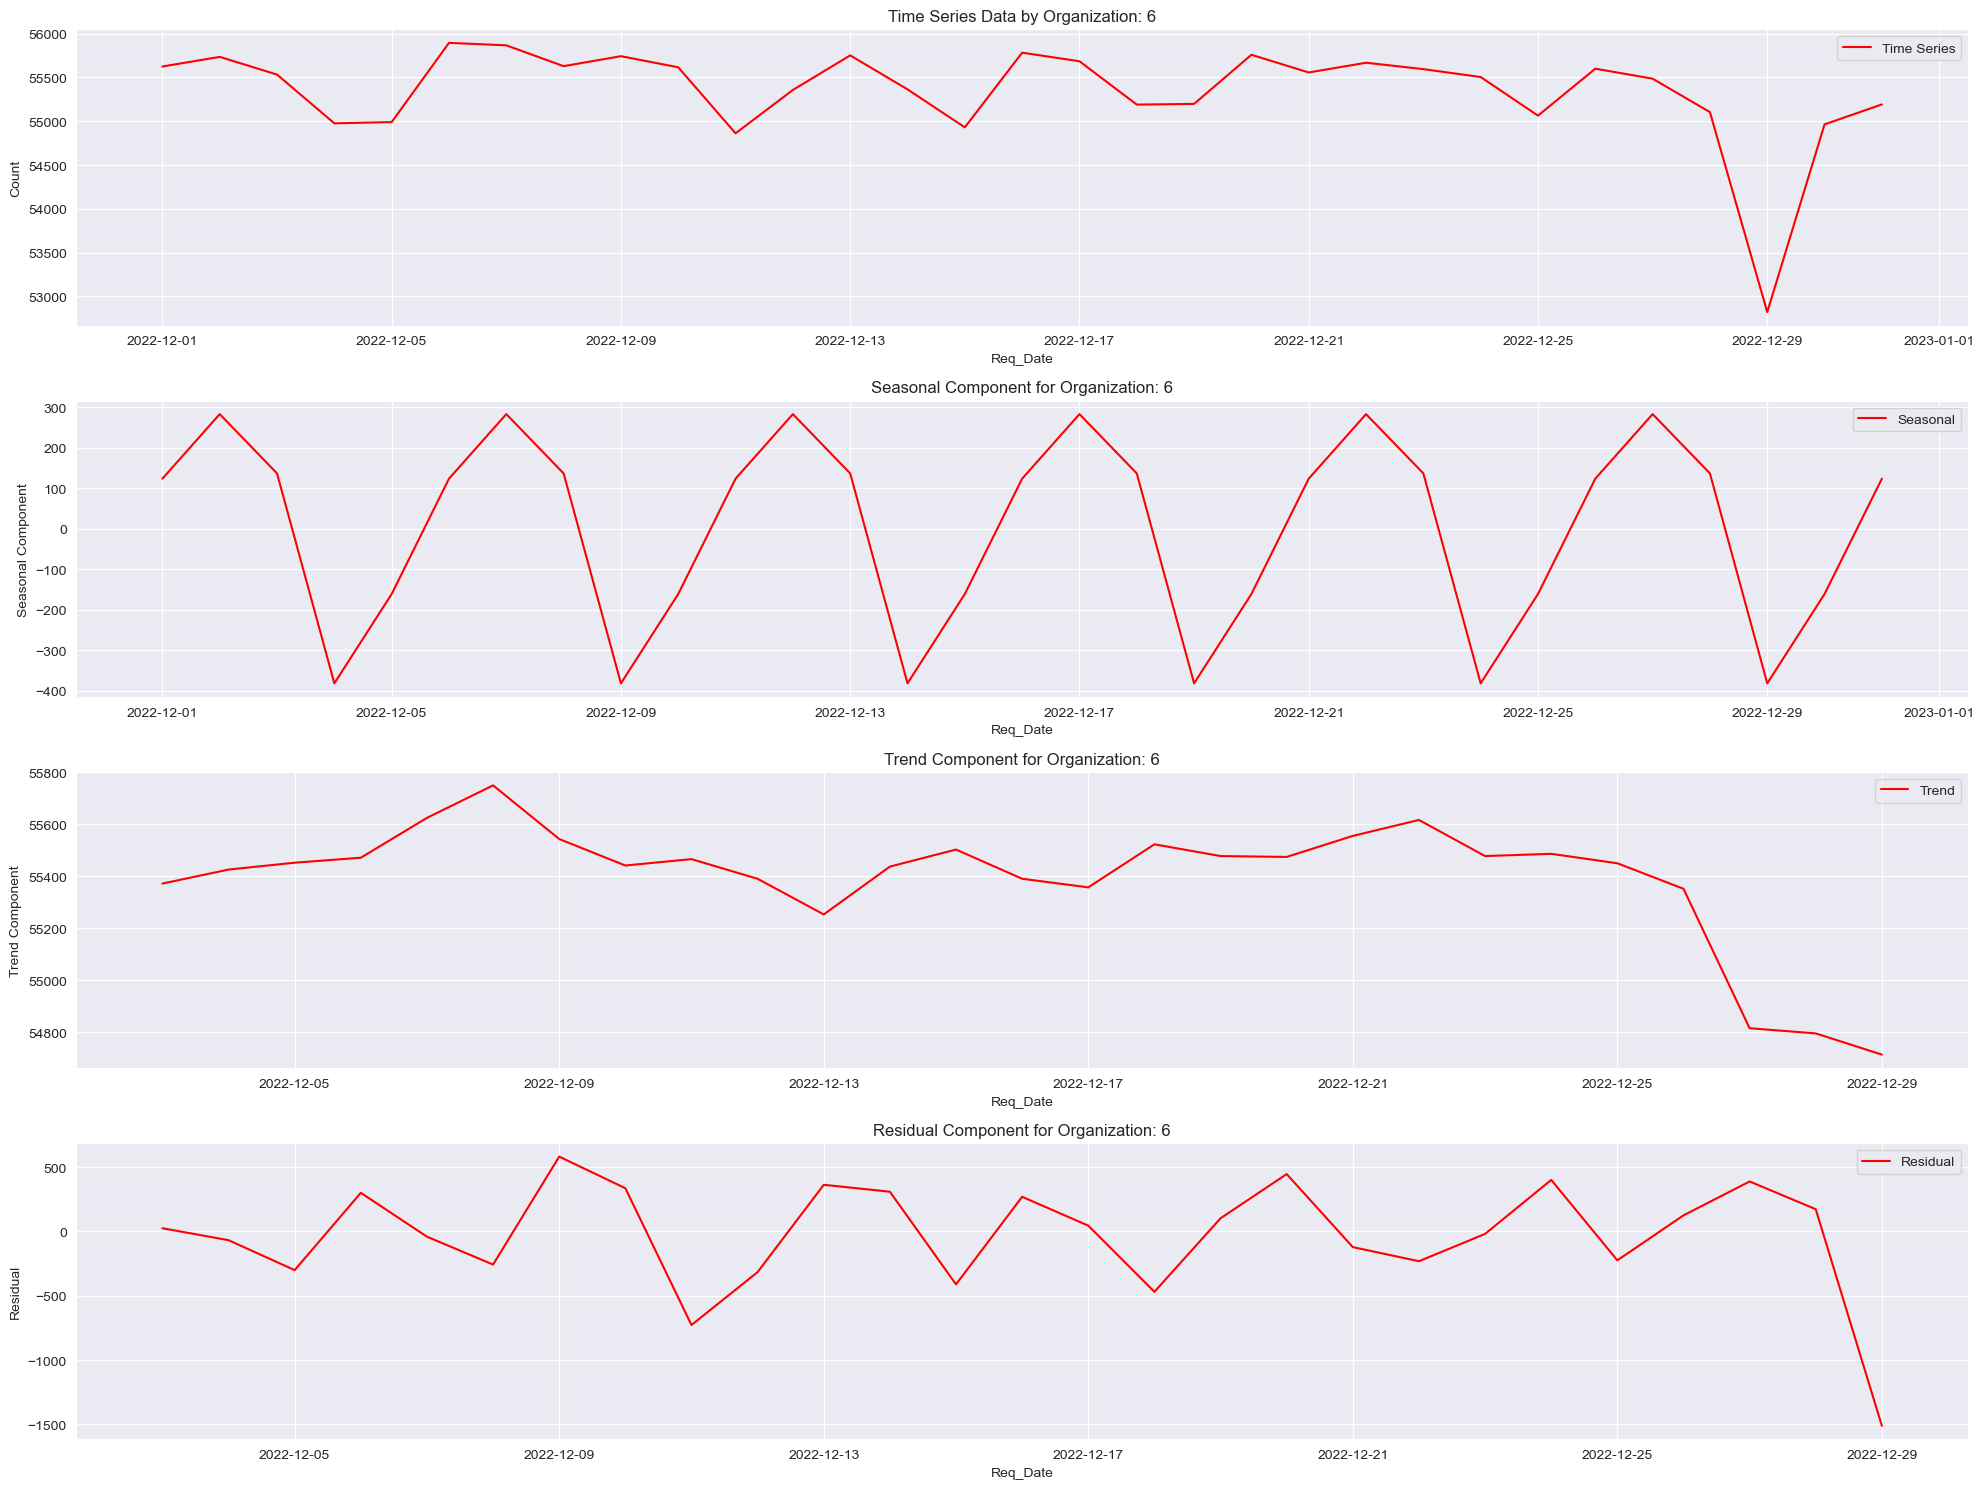

In [19]:
from statsmodels.tsa.seasonal import seasonal_decompose


count_data = df_2.groupby(['Req_Date', 'Organization']).size().sort_values(ascending=False).reset_index(name='Count')
pivot_data = count_data.pivot(index='Req_Date', columns='Organization', values='Count')
top_organizations = count_data.groupby('Organization')['Count'].sum().nlargest(3).index
filtered_data = count_data[count_data['Organization'].isin(top_organizations)]

# Pivot the data to have 'Organization' as columns and 'timestamp_resp' as index
pivot_data = filtered_data.pivot(index='Req_Date', columns='Organization', values='Count')

# Plot the time series for each organization
plt.figure(figsize=(20, 10))

colors = ['blue', 'green', 'red']# Specify colors for the organizations

for i, organization in enumerate(pivot_data.columns):
   plt.plot(pivot_data.index, pivot_data[organization], label=str(organization), color=colors[i])


plt.xlabel('Req_Date')
plt.ylabel('Count')
plt.title('Time Series Data by Top 10 Organizations')
plt.legend()

pivot_data = pivot_data.fillna(pivot_data.mean())

for i, organization in enumerate(pivot_data.columns):
  # Perform seasonal decomposition
    decomposition = seasonal_decompose(pivot_data[organization], period=5)
    seasonal = decomposition.seasonal
    trend = decomposition.trend
    residual = decomposition.resid


    # Plot the time series, seasonal component, trend, and residual
    plt.figure(figsize=(20, 15))

    # Time series
    plt.subplot(4, 1, 1)
    plt.plot(pivot_data.index, pivot_data[organization], label='Time Series', color=colors[i])
    plt.xlabel('Req_Date')
    plt.ylabel('Count')
    plt.title(f'Time Series Data by Organization: {organization}')
    plt.legend()

    # Seasonal component
    plt.subplot(4, 1, 2)
    plt.plot(pivot_data.index, seasonal, label='Seasonal', color=colors[i])
    plt.xlabel('Req_Date')
    plt.ylabel('Seasonal Component')
    plt.title(f'Seasonal Component for Organization: {organization}')
    plt.legend()

    # Trend component
    plt.subplot(4, 1, 3)
    plt.plot(pivot_data.index, trend, label='Trend', color=colors[i])
    plt.xlabel('Req_Date')
    plt.ylabel('Trend Component')
    plt.title(f'Trend Component for Organization: {organization}')
    plt.legend()

    # Residual component
    plt.subplot(4, 1, 4)
    plt.plot(pivot_data.index, residual, label='Residual', color=colors[i])
    plt.xlabel('Req_Date')
    plt.ylabel('Residual')
    plt.title(f'Residual Component for Organization: {organization}')
    plt.legend()

    plt.tight_layout()
    plt.show()

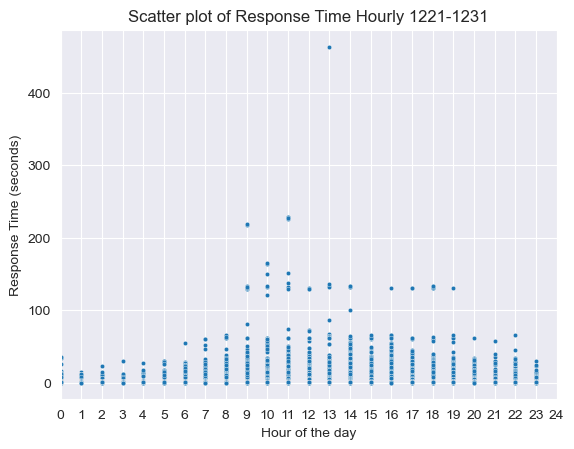

<Figure size 1000x500 with 0 Axes>

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=df_2['Hour'], y=df_2['Time_Diff'], s=10)
plt.title('Scatter plot of Response Time Hourly 1221-1231')
plt.xlabel('Hour of the day')
plt.ylabel('Response Time (seconds)')
plt.xlim(0, 24) # set the limits of the x-axis
plt.xticks(range(0, 25)) # set the tick marks on the x-axis
plt.figure(figsize=(10, 5))
plt.show()

df_2['Hour'] = pd.to_numeric(df_2['Hour'])

In [21]:
# Count the occurrences of each HTTP method and calculate the proportions
http_method_proportions = df_2['HttpMethod'].value_counts() / len(df_2)

# Convert to DataFrame for a tabular view and reset index
http_method_proportions_df = http_method_proportions.reset_index()

# Rename columns
http_method_proportions_df.columns = ['httpMethod', 'Proportion']

# Multiply proportions by 100 to get percentages
http_method_proportions_df['Proportion'] = (http_method_proportions_df['Proportion'] * 100)

http_method_proportions_df.loc[3:, 'httpMethod'] = 'Other'

# Display the DataFrame
http_method_proportions_df = http_method_proportions_df.head(3)

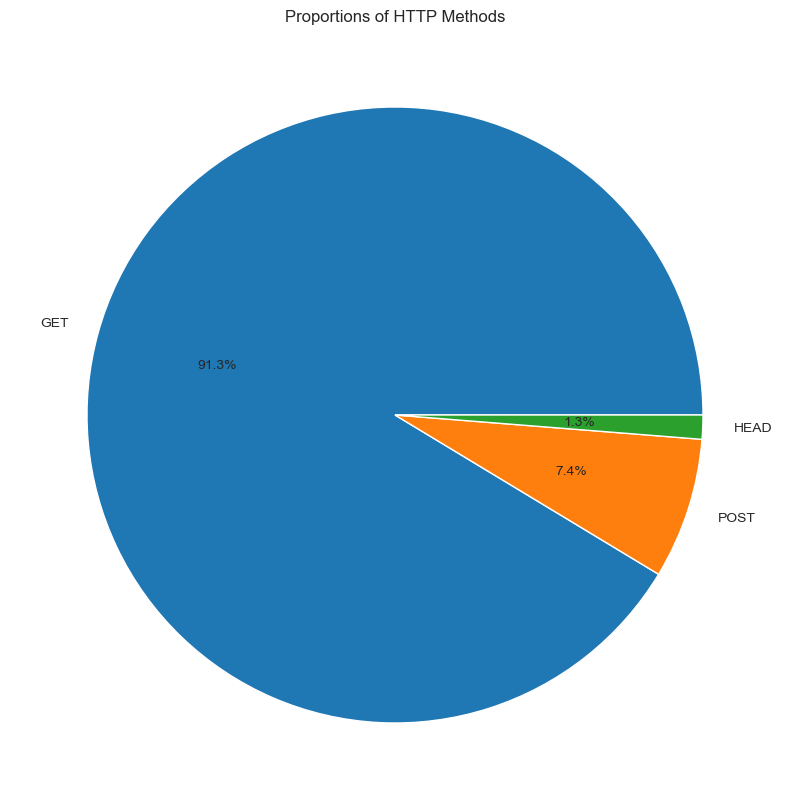

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
# Plot the pie chart
plt.pie(http_method_proportions_df['Proportion'], labels=http_method_proportions_df['httpMethod'], autopct='%1.1f%%')

# Add a title
plt.title('Proportions of HTTP Methods')

# Display the chart
plt.show()

In [26]:
Time2 = df_2.groupby('Weekday')['EventId'].count().reset_index(name='Events')
Time2

,Weekday,Events
0,Friday,2988274
1,Monday,2807381
2,Saturday,2968767
3,Sunday,2500915
4,Thursday,2739236
5,Tuesday,2735476
6,Wednesday,2598341


In [27]:
import pandas as pd

# Define the desired order of weekdays
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Convert the 'Weekday' column to Categorical with the specified order
Time2['Weekday'] = pd.Categorical(Time2['Weekday'], categories=weekday_order, ordered=True)

# Sort the DataFrame based on the 'Weekday' column
Time2_sorted = Time2.sort_values('Weekday')

# Display the sorted DataFrame
Time2_sorted

,Weekday,Events
1,Monday,2807381
5,Tuesday,2735476
6,Wednesday,2598341
4,Thursday,2739236
0,Friday,2988274
2,Saturday,2968767
3,Sunday,2500915


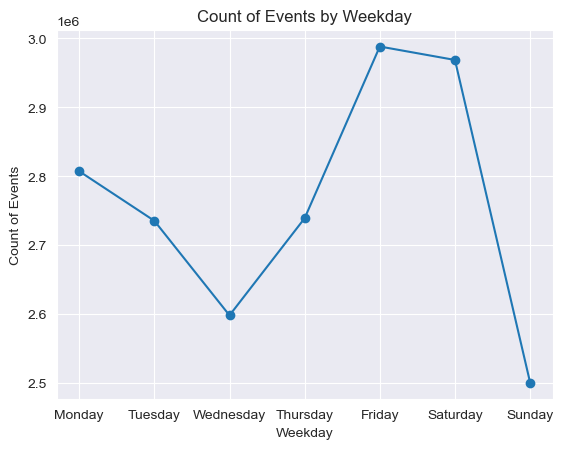

In [28]:
import matplotlib.pyplot as plt

# Create the line plot
plt.plot(Time2_sorted['Weekday'], Time2_sorted['Events'], marker='o')

# Add labels and title
plt.xlabel('Weekday')
plt.ylabel('Count of Events')
plt.title('Count of Events by Weekday')

# Display the plot
plt.show()


In [29]:
import pandas as pd

# Assuming you have a DataFrame named df with a column named 'date' containing the dates

# Convert 'date' column to datetime type
df_2['Timestamp'] = pd.to_datetime(df_2['Timestamp'])

# Define the desired date range
start_date = pd.to_datetime('2022-12-21')
end_date = pd.to_datetime('2022-12-31')

# Select rows within the date range
df_3 = df_2[(df_2['Timestamp'] >= start_date) & (df_2['Timestamp'] <= end_date)]

# Display the selected rows
df_3

,Timestamp,EventId,EventTime,IngestTime,SourceIp,HttpMethod,HttpUrl,HttpAuth,Resource,Organization,...,Entity,Timestamp_Req,Timestamp_Resp,Req_Date,Req_Time,Resp_Date,Resp_Time,Time_Diff,Weekday,Hour
12533847,2022-12-21 00:00:02,1TKG8H560OZ8LE4AKPK1G41H6,2022-12-20 23:59:42.529327,2022-12-21 00:00:02.111771700+00:00,62.48.164.172,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 2b93,DocumentResource.get,3,...,3,2022-12-20 23:59:42.426435,2022-12-20 23:59:42.529327,2022-12-20,23:59:42.426435,2022-12-20,23:59:42.529327,0.102892,Tuesday,23
12533848,2022-12-21 00:00:02,9V06B9PYIAED1BQ1F0GMVVMVU,2022-12-20 23:59:49.963184,2022-12-21 00:00:02.111777800+00:00,62.48.164.172,GET,https://api.docdigitizer.com/api/v1/tasks/b01c...,API_KEY 2b93,TaskResource.get,3,...,3,2022-12-20 23:59:49.885761,2022-12-20 23:59:49.963184,2022-12-20,23:59:49.885761,2022-12-20,23:59:49.963184,0.077423,Tuesday,23
12533849,2022-12-21 00:00:02,16K18VCWCWN4E1FF8YO7DFP4UN,2022-12-20 23:59:49.551972,2022-12-21 00:00:02.111777400+00:00,62.48.164.172,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 2b93,DocumentResource.get,3,...,3,2022-12-20 23:59:49.465015,2022-12-20 23:59:49.551972,2022-12-20,23:59:49.465015,2022-12-20,23:59:49.551972,0.086957,Tuesday,23
12533850,2022-12-21 00:00:02,JC66ZGXP9WPGNDWCPN4D656K,2022-12-20 23:59:49.284104,2022-12-21 00:00:02.111777+00:00,62.48.164.172,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 2b93,DocumentResource.get,3,...,3,2022-12-20 23:59:49.181868,2022-12-20 23:59:49.284104,2022-12-20,23:59:49.181868,2022-12-20,23:59:49.284104,0.102236,Tuesday,23
12533851,2022-12-21 00:00:02,FTSPRGTPSZZ91VY9B98UIJWHD,2022-12-20 23:59:48.749504,2022-12-21 00:00:02.111776500+00:00,62.48.164.172,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 2b93,DocumentResource.get,3,...,3,2022-12-20 23:59:48.655911,2022-12-20 23:59:48.749504,2022-12-20,23:59:48.655911,2022-12-20,23:59:48.749504,0.093593,Tuesday,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18769042,2022-12-30 23:59:54,V9818Y41TYGT1K84VF37HH2LP,2022-12-30 23:59:49.422249,2022-12-30 23:59:54.540604100+00:00,NaN,GET,https://10.154.0.38/liveness_check,NaN,NaN,2,...,2,2022-12-30 23:59:49.421891,2022-12-30 23:59:49.422249,2022-12-30,23:59:49.421891,2022-12-30,23:59:49.422249,0.000358,Friday,23
18769043,2022-12-30 23:59:54,1KGAEI07W7K2P1ATD0VC3P276W,2022-12-30 23:59:47.807482,2022-12-30 23:59:54.540603+00:00,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/b18d...,API_KEY 6b50,TaskResource.get,6,...,6,2022-12-30 23:59:47.806403,2022-12-30 23:59:47.807482,2022-12-30,23:59:47.806403,2022-12-30,23:59:47.807482,0.001079,Friday,23
18769044,2022-12-30 23:59:54,1LJGIHEUT7ITQNGSW8QJBT4PU,2022-12-30 23:59:48.052580,2022-12-30 23:59:54.540603600+00:00,NaN,GET,https://10.154.0.38/readiness_check,NaN,NaN,2,...,2,2022-12-30 23:59:48.052276,2022-12-30 23:59:48.052580,2022-12-30,23:59:48.052276,2022-12-30,23:59:48.052580,0.000304,Friday,23
18769045,2022-12-30 23:59:54,TRI33L85E9Y91IZOJXBH807F5,2022-12-30 23:59:49.290830,2022-12-30 23:59:54.540603800+00:00,NaN,GET,https://10.154.0.38/readiness_check,NaN,NaN,2,...,2,2022-12-30 23:59:49.290549,2022-12-30 23:59:49.290830,2022-12-30,23:59:49.290549,2022-12-30,23:59:49.290830,0.000281,Friday,23


In [30]:
df_3 = df_3.dropna()
df_3

,Timestamp,EventId,EventTime,IngestTime,SourceIp,HttpMethod,HttpUrl,HttpAuth,Resource,Organization,...,Entity,Timestamp_Req,Timestamp_Resp,Req_Date,Req_Time,Resp_Date,Resp_Time,Time_Diff,Weekday,Hour
12533847,2022-12-21 00:00:02,1TKG8H560OZ8LE4AKPK1G41H6,2022-12-20 23:59:42.529327,2022-12-21 00:00:02.111771700+00:00,62.48.164.172,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 2b93,DocumentResource.get,3,...,3,2022-12-20 23:59:42.426435,2022-12-20 23:59:42.529327,2022-12-20,23:59:42.426435,2022-12-20,23:59:42.529327,0.102892,Tuesday,23
12533848,2022-12-21 00:00:02,9V06B9PYIAED1BQ1F0GMVVMVU,2022-12-20 23:59:49.963184,2022-12-21 00:00:02.111777800+00:00,62.48.164.172,GET,https://api.docdigitizer.com/api/v1/tasks/b01c...,API_KEY 2b93,TaskResource.get,3,...,3,2022-12-20 23:59:49.885761,2022-12-20 23:59:49.963184,2022-12-20,23:59:49.885761,2022-12-20,23:59:49.963184,0.077423,Tuesday,23
12533849,2022-12-21 00:00:02,16K18VCWCWN4E1FF8YO7DFP4UN,2022-12-20 23:59:49.551972,2022-12-21 00:00:02.111777400+00:00,62.48.164.172,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 2b93,DocumentResource.get,3,...,3,2022-12-20 23:59:49.465015,2022-12-20 23:59:49.551972,2022-12-20,23:59:49.465015,2022-12-20,23:59:49.551972,0.086957,Tuesday,23
12533850,2022-12-21 00:00:02,JC66ZGXP9WPGNDWCPN4D656K,2022-12-20 23:59:49.284104,2022-12-21 00:00:02.111777+00:00,62.48.164.172,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 2b93,DocumentResource.get,3,...,3,2022-12-20 23:59:49.181868,2022-12-20 23:59:49.284104,2022-12-20,23:59:49.181868,2022-12-20,23:59:49.284104,0.102236,Tuesday,23
12533851,2022-12-21 00:00:02,FTSPRGTPSZZ91VY9B98UIJWHD,2022-12-20 23:59:48.749504,2022-12-21 00:00:02.111776500+00:00,62.48.164.172,GET,https://api.docdigitizer.com/api/v1/documents/...,API_KEY 2b93,DocumentResource.get,3,...,3,2022-12-20 23:59:48.655911,2022-12-20 23:59:48.749504,2022-12-20,23:59:48.655911,2022-12-20,23:59:48.749504,0.093593,Tuesday,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18769035,2022-12-30 23:59:53,12W214KNEYEBD5YT313VZWTEU,2022-12-30 23:59:47.911920,2022-12-30 23:59:53.178484+00:00,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/68cc...,API_KEY 6b50,TaskResource.get,6,...,6,2022-12-30 23:59:47.910674,2022-12-30 23:59:47.911920,2022-12-30,23:59:47.910674,2022-12-30,23:59:47.911920,0.001246,Friday,23
18769036,2022-12-30 23:59:53,1SA0X1EPBW5NO1M83RJNAOGGF0,2022-12-30 23:59:48.024966,2022-12-30 23:59:53.178484400+00:00,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/e7f3...,API_KEY 6b50,TaskResource.get,6,...,6,2022-12-30 23:59:48.023743,2022-12-30 23:59:48.024966,2022-12-30,23:59:48.023743,2022-12-30,23:59:48.024966,0.001223,Friday,23
18769040,2022-12-30 23:59:54,9T8WTO21S7ZR1SSPLVKMOFU7N,2022-12-30 23:59:47.590724,2022-12-30 23:59:54.540602500+00:00,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/a1ca...,API_KEY 6b50,TaskResource.get,6,...,6,2022-12-30 23:59:47.589313,2022-12-30 23:59:47.590724,2022-12-30,23:59:47.589313,2022-12-30,23:59:47.590724,0.001411,Friday,23
18769041,2022-12-30 23:59:54,1Y12UVN2UAA3R128VS8ZCT285W,2022-12-30 23:59:47.485516,2022-12-30 23:59:54.540602100+00:00,62.48.164.170,GET,https://api.docdigitizer.com/api/v1/tasks/37df...,API_KEY 6b50,TaskResource.get,6,...,6,2022-12-30 23:59:47.483445,2022-12-30 23:59:47.485516,2022-12-30,23:59:47.483445,2022-12-30,23:59:47.485516,0.002071,Friday,23


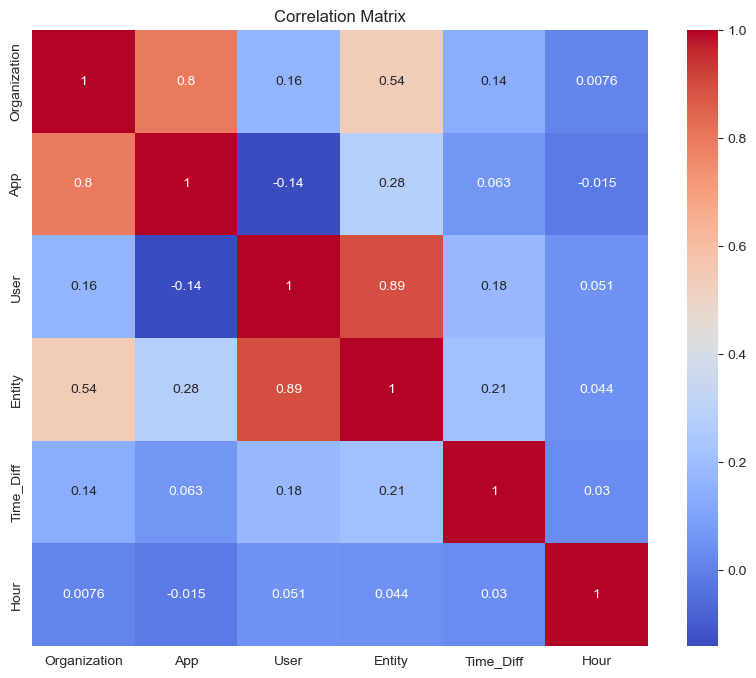

In [31]:
# Compute the correlation matrix
corr_matrix = df_3.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)

# Add a title
plt.title('Correlation Matrix')

# Display the plot
plt.show()

In [32]:
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df_3[['Organization', 'App', 'User','Entity','Hour']],df_3['Time_Diff'], test_size=0.2, random_state=1)

In [33]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

def evaluate_regression(y_true, y_pred):
    # Calculate mean squared error (MSE)
    mse = mean_squared_error(y_true, y_pred)
    print('Mean Squared Error:', mse)

    # Calculate root mean squared error (RMSE)
    rmse = np.sqrt(mse)
    print('Root Mean Squared Error:', rmse)

    # Calculate R-squared (R2) score
    r2 = r2_score(y_true, y_pred)
    print('R-squared Score:', r2)

In [34]:
from sklearn.linear_model import LinearRegression

# Create an instance of the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [35]:
evaluate_regression(y_test, y_pred)

Mean Squared Error: 0.1984409315047946
Root Mean Squared Error: 0.44546709362734593
R-squared Score: 0.056881250347808776


In [36]:
from sklearn.tree import DecisionTreeRegressor

# Create an instance of the Decision Tree Regression model
model = DecisionTreeRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [37]:
evaluate_regression(y_test, y_pred)

Mean Squared Error: 0.1453434458350889
Root Mean Squared Error: 0.38123935504494927
R-squared Score: 0.3092346026262326


In [38]:
from sklearn.ensemble import GradientBoostingRegressor

# Create an instance of the Gradient Boosting Regression model
model = GradientBoostingRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [39]:
evaluate_regression(y_test, y_pred)

Mean Squared Error: 0.15646215844844785
Root Mean Squared Error: 0.39555297805533945
R-squared Score: 0.2563913396051669


In [40]:
import xgboost as xgb

# Create an instance of the XGBRegressor model
model = xgb.XGBRegressor()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

In [41]:
evaluate_regression(y_test, y_pred)

Mean Squared Error: 0.1455129055543677
Root Mean Squared Error: 0.38146153876160005
R-squared Score: 0.3084292212094518
